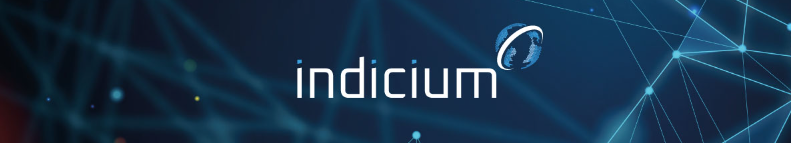
# 1. Introdução

---
➤ **Problema de Negócio:** A PProductions, um estúdio de Hollywood, precisa de orientação para qual próximo tipo de filme deve ser desenvolvido. Para embasar nossa análise e recomendações para a produtora, temos uma base de dados com diversas informações sobre obras cinemátograficas de diversos períodos.


## Visão geral sobre o dataset

---
Nossa base de dados contém 1000 filmes de alta avaliação, extraídos da plataforma IMDB. O dataset tem 15 colunas que combinam:

➤ Dados Numéricos: Faturamento, Duração, Ano de Lançamento e as notas do IMDB e MetaScore.

➤ Dados Categóricos: Gênero, Diretor, Elenco Principal e Classificação Etária.

➤ Dados de texto: A sinopse do filme.  

Entretanto, verificaremos que nem todas as variáveis já estão no formato ideal para trabalharmos.


Importações


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

Carregando o dataset

In [2]:
pd.set_option('display.max_columns', None)
base = pd.read_csv('desafio_indicium_imdb.csv')


Informações

---
Com algumas linhas de código verificamos a estrutura do dataset, suas principais características e a partir daí já conseguimos fazer algumas observações.


Tamanho do dataset

In [3]:
base.shape

(999, 16)

Visualizando a base

In [4]:
base.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [5]:
base.tail()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
994,995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
995,996,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
996,997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
997,998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN
998,999,The 39 Steps,1935,NaN,86 min,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,93.0,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,NaN


Informações estatísticas

In [6]:
base.describe()

,Unnamed: 0,IMDB_Rating,Meta_score,No_of_Votes
count,999.000000,999.000000,842.000000,9.990000e+02
mean,500.000000,7.947948,77.969121,2.716214e+05
std,288.530761,0.272290,12.383257,3.209126e+05
min,1.000000,7.600000,28.000000,2.508800e+04
25%,250.500000,7.700000,70.000000,5.547150e+04
50%,500.000000,7.900000,79.000000,1.383560e+05
75%,749.500000,8.100000,87.000000,3.731675e+05
max,999.000000,9.200000,100.000000,2.303232e+06


Verificando o tipo dos dados

In [7]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


Verificando a existência de valores nulos

In [8]:
base.isnull().sum()

,0
Unnamed: 0,0
Series_Title,0
Released_Year,0
Certificate,101
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,157
Director,0


**INSIGHTS:**

➤ Nosso Dataset tem 999 filmes, de 0 a 998.

➤ Há uma coluna irrelevante 'Unmaded:0' que lista a posição, precisamos removê-la.

➤ A coluna 'Runtime' além de estar como objeto também está com a string 'min' ao lado do tempo de duração, iremos corrigir isso.

➤ 'Released_Year' e 'Gross' são variáveis númericas, mas também estão listadas como objeto.

➤ Verificamos a presença de dados inscosistentes, há alguns valore nulos no dataset.

# 2. Pré - Processamento


Formatando e transformando variáveis

In [9]:
base['Runtime'] = base['Runtime'].astype(str).str.replace(' min', '', regex=False).astype(int)

base['Gross'] = base['Gross'].astype(str).str.replace(',', '', regex=True)
base['Gross'] = pd.to_numeric(base['Gross'], errors='coerce')
base['Released_Year'] = pd.to_numeric(base['Released_Year'], errors='coerce')

base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  998 non-null    float64
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    int64  
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    float64
dtypes: float64(4), int64(3), object(9)
memory usage: 125.0+ KB


Tratando dados nulos

In [10]:
base[base['Released_Year'].isnull()]

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
965,966,Apollo 13,NaN,U,140,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,173837933.0


In [11]:
base.loc[965, 'Released_Year'] = 1995

➤ Verificamos que o filme Apollo 13 é o único que não tem seu ano de lançamento no dataset. Como faltava apenas um valor e estava disponível em outras fontes, adotei como estratégia incluir o dado que faltava.

➤ Verificamos que a coluna "Gross" também tem valores faltantes, optei por preencher eles com a mediana por ela forncer uma estimativa mais realista para o faturamento de um filme, visto que a média desta variável é muito influenciada por outliers, um número pequeno de filmes que tem faturamentos astrônomicos.

➤ Verificamos que a coluna "Meta_score" também tem valores nulos, mas aqui optei por preencher com a média, por ser uma variável com bem menos outliers. Utilizando o . describe() ,anteriormente, observamos que a média, com valor de 77.97, é extremamente próxima da mediana, que é 79.0.

➤Para a classificação etária "Certificate", por ser uma variável categórica, optei por preencher com a moda.


In [12]:
median_gross = base['Gross'].median()
base['Gross'].fillna(median_gross, inplace=True)

median_metascore = base['Meta_score'].median()
base['Meta_score'].fillna(median_metascore, inplace=True)

mode_certificate = base['Certificate'].mode()[0]
base['Certificate'].fillna(mode_certificate, inplace=True)

base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    float64
 3   Certificate    999 non-null    object 
 4   Runtime        999 non-null    int64  
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     999 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          999 non-null    float64
dtypes: float64(4), int64(3), object(9)
memory usage: 125.0+ KB


/tmp/ipython-input-3216754152.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  base['Gross'].fillna(median_gross, inplace=True)
/tmp/ipython-input-3216754152.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [13]:
base.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972.0,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,2,The Dark Knight,2008.0,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
2,3,The Godfather: Part II,1974.0,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
3,4,12 Angry Men,1957.0,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
4,5,The Lord of the Rings: The Return of the King,2003.0,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0


In [14]:
base.tail()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
994,995,Breakfast at Tiffany's,1961.0,A,115,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,23457439.5
995,996,Giant,1956.0,G,201,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,23457439.5
996,997,From Here to Eternity,1953.0,Passed,118,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0
997,998,Lifeboat,1944.0,U,97,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,23457439.5
998,999,The 39 Steps,1935.0,U,86,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,93.0,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,23457439.5


# Análise Exploratória de Dados (EDA)

## Variáveis numéricas

➤ Como a nota do IMDB é nossa variável alvo, separei ela para analisarmos. individualmente

Histograma IMDB_Rating

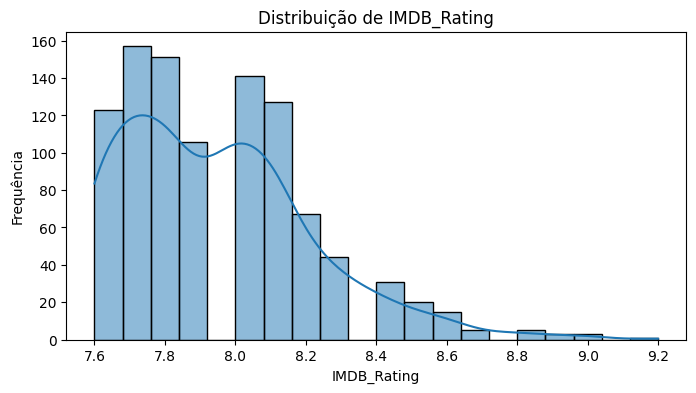

In [15]:
plt.figure(figsize=(8, 4))
sns.histplot(base['IMDB_Rating'], kde=True, bins=20)
plt.title('Distribuição de IMDB_Rating')
plt.xlabel('IMDB_Rating')
plt.ylabel('Frequência')
plt.show()


**INSIGHTS E HIPÓTESES:**

➤ Observamos que nosso dataset possui não possui filmes de baixa avaliação, todos estão entre 7.6 e 9.2

➤ Observamos dois picos um em 7.7 e outro em 8.1, o que sugere a existência de dois grupos.

➤ Há uma concentração maior de filmes entre 7.6 e 8.2, quanto maior a nota menor a quantidade de filmes, o que faz bastante sentido.

Box Plot IMDB_Rating

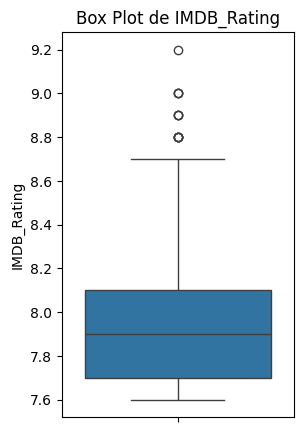

In [16]:
plt.figure(figsize=(3, 5))
sns.boxplot(y=base['IMDB_Rating'])
plt.title('Box Plot de IMDB_Rating')
plt.ylabel('IMDB_Rating')
plt.show()

**INSIGHTS E HIPÓSTESES:**

➤ O boxplot nos diz que metade dos filmes tem nota inferior a 7.9, e 75% tem nota inferior a 8.1.

➤ Observamos também, pelos limites superiores e inferiores, que valores normais estão entre 7.6 e 8.7. Há alguns outliers acima de 8.7, são filmes com notas fora da curva.

Transformações

In [17]:
base['No_of_Votes_log'] = np.log1p(base['No_of_Votes'])

base['Gross_log'] = np.log1p(base['Gross'])


➤ Como as variáveis 'No_of_Votes_log' e 'Gross' tem valores muito altos e discrepantes, criamos uma várivel aplicando transformação logarítmica nelas para melhorar a visualização e detecção de padrões.

Histogramas variáveis numéricas

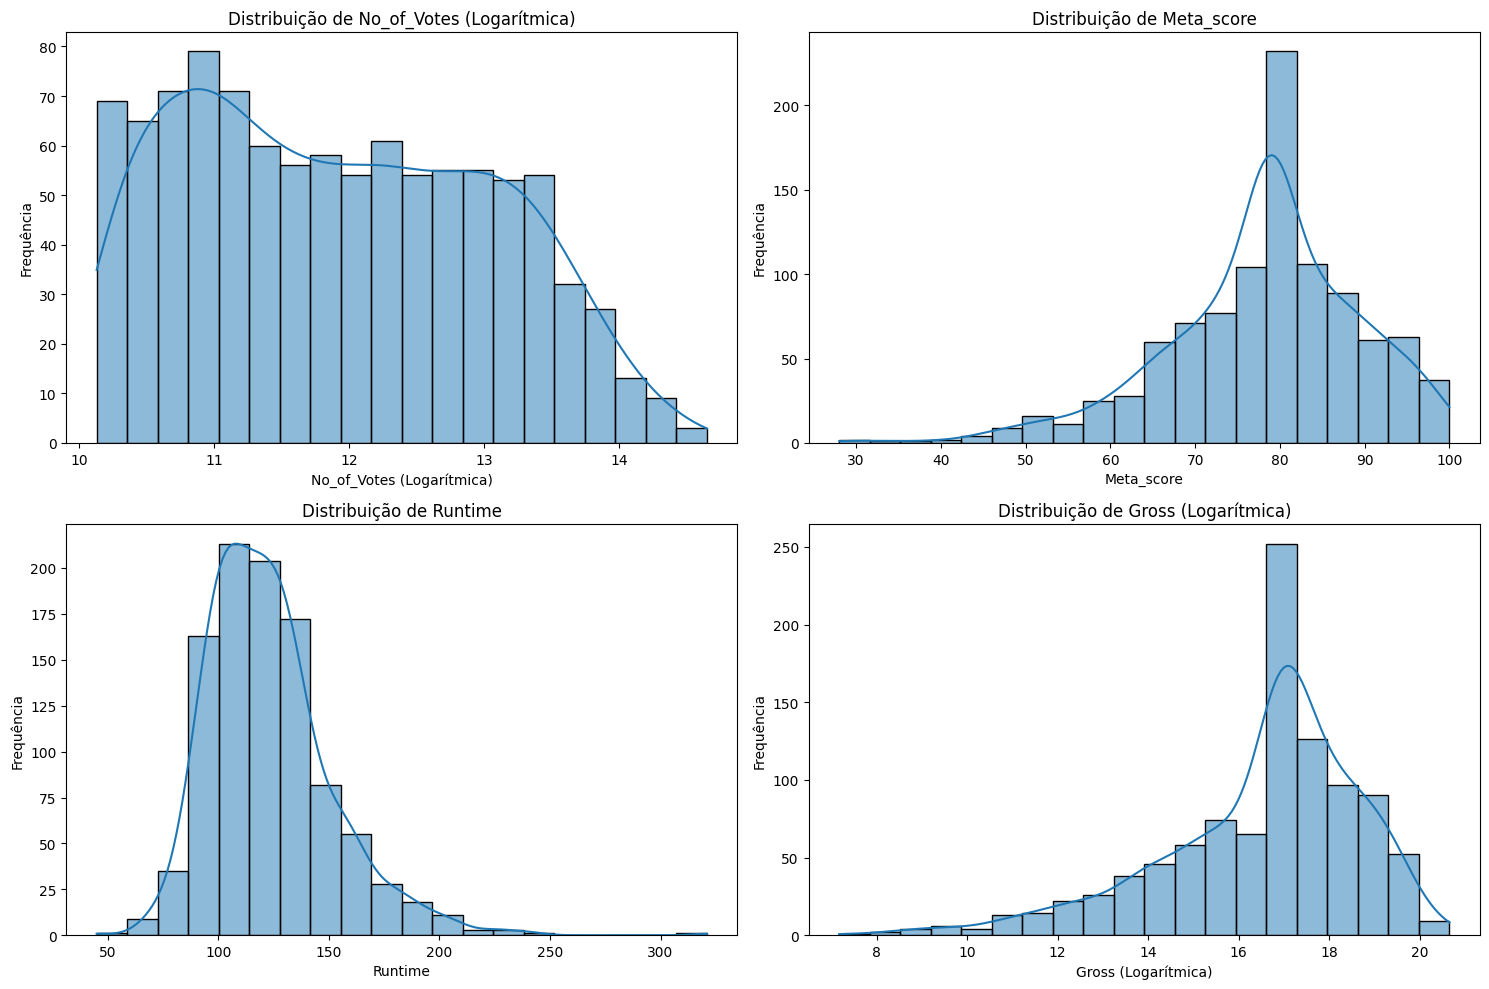

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(base['No_of_Votes_log'], kde=True, bins=20, ax=axes[0, 0])
axes[0, 0].set_title('Distribuição de No_of_Votes (Logarítmica)')
axes[0, 0].set_xlabel('No_of_Votes (Logarítmica)')
axes[0, 0].set_ylabel('Frequência')

sns.histplot(base['Meta_score'], kde=True, bins=20, ax=axes[0, 1])
axes[0, 1].set_title('Distribuição de Meta_score')
axes[0, 1].set_xlabel('Meta_score')
axes[0, 1].set_ylabel('Frequência')

sns.histplot(base['Runtime'], kde=True, bins=20, ax=axes[1, 0])
axes[1, 0].set_title('Distribuição de Runtime')
axes[1, 0].set_xlabel('Runtime')
axes[1, 0].set_ylabel('Frequência')

sns.histplot(base['Gross_log'], kde=True, bins=20, ax=axes[1, 1])
axes[1, 1].set_title('Distribuição de Gross (Logarítmica)')
axes[1, 1].set_xlabel('Gross (Logarítmica)')
axes[1, 1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

**INSIGHTS E HIPÓTESES:**

➤ Em releção ao número de votos, percebemos uma distribuição variada e sem muitos picos, isso sugere que há uma grande variedade de popularidade dentro do nosso dataset.

➤ Quanto à avaliação da crítica, percebemos uma distribuiçaõ maior para a direita, o que aponta que a critica avaliou a maioria dos filmes do nosso dataset como muito bom. Temos um pico próximo de 80, porém ele também é inlfuenciado pelo tratamento de dados faltantes que preenchemos com a média.

➤ Quanto à duração, o histograma nos mostra que há um tempo ideal para filmes entre 100 e 140, diminuindo a frequência quando o tempo se distancia disso.

➤ Quanto ao faturamento, observamos uma grande variedade que tende a se agrupar mais à direita, mostrando que muitos do filmes do dataset tem um grande faturamento, porém também temos filmes com menos. Importante ressaltar que nosso tratamento de valores nulos também criou um pico no valor que escolhemos para preencher.

Box Plot variáveis numéricas

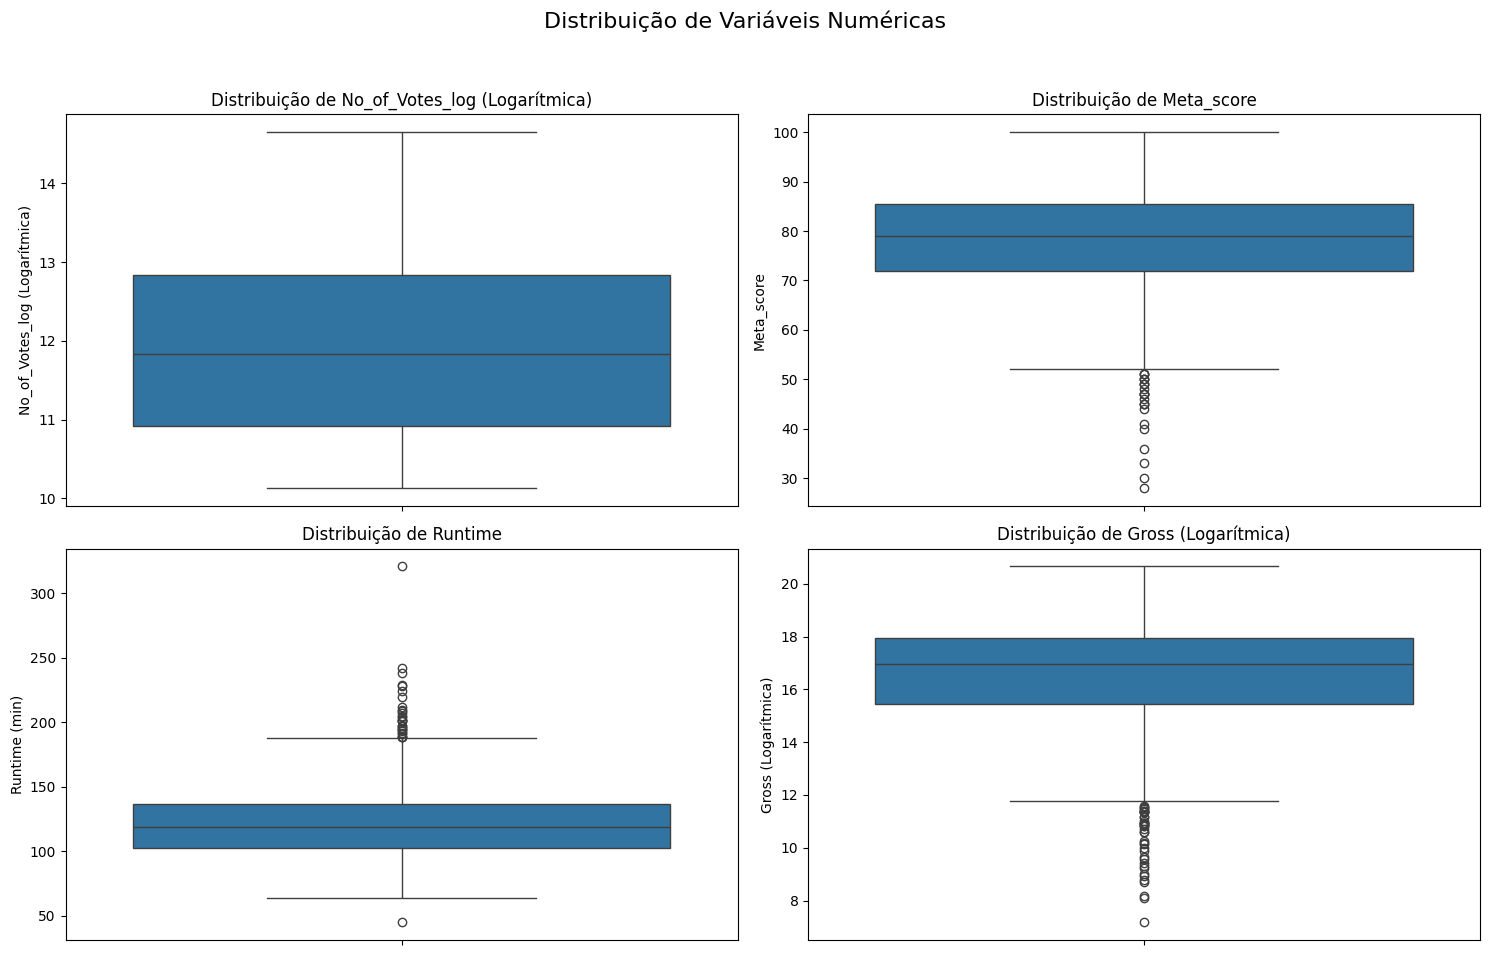

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribuição de Variáveis Numéricas', fontsize=16)

sns.boxplot(y=base['No_of_Votes_log'], ax=axes[0, 0])
axes[0, 0].set_title('Distribuição de No_of_Votes_log (Logarítmica)')
axes[0, 0].set_ylabel('No_of_Votes_log (Logarítmica)')

sns.boxplot(y=base['Meta_score'], ax=axes[0, 1])
axes[0, 1].set_title('Distribuição de Meta_score')
axes[0, 1].set_ylabel('Meta_score')

sns.boxplot(y=base['Runtime'], ax=axes[1, 0])
axes[1, 0].set_title('Distribuição de Runtime')
axes[1, 0].set_ylabel('Runtime (min)')

sns.boxplot(y=base['Gross_log'], ax=axes[1, 1])
axes[1, 1].set_title('Distribuição de Gross (Logarítmica)')
axes[1, 1].set_ylabel('Gross (Logarítmica)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**INSIGHTS E HIPÓSTESES:**

➤ Sobre o número de votos, a caixa bastante larga confirma que temos uma grande variedade de popularidade. Não vemos outliers, mas isso se deve muito à transformação logaritmica que fizemos, isso deixou os dados mais próximos.

➤ Sobre a nota da crítica conseguimos observar que a nota mediana é muito boa, perto de 79. Também observamos abaixo da linha inferior que temos alguns outliers, filmes com avaliações muito abaixo do geral.

➤ Em relação ao tempo de duração, observamos que a metade dos filmes tem duração até 125 minutos e que a maioria dos filmes do nosso dataset  tem um tempo mais curto/médio, com alguns outliers com tempos extremamente longos.

➤ Sobre o faturamento, observamos pela quantidade de outliers abaixo da linha inferior que, mesmo nos filmes de sucesso como os do nosso dataset, há filmes que não arrecadaram tanto.

10 Filmes com maior faturamento

In [20]:
top_gross = base.sort_values(by='Gross', ascending=False).head(10)
display(top_gross[['Series_Title', 'Gross']])

,Series_Title,Gross
476,Star Wars: Episode VII - The Force Awakens,936662225.0
58,Avengers: Endgame,858373000.0
622,Avatar,760507625.0
59,Avengers: Infinity War,678815482.0
651,Titanic,659325379.0
356,The Avengers,623279547.0
890,Incredibles 2,608581744.0
1,The Dark Knight,534858444.0
581,Rogue One,532177324.0
62,The Dark Knight Rises,448139099.0


10 Filmes com maior nota IMDB

In [21]:
top_imdb = base.sort_values(by='IMDB_Rating', ascending=False).head(10)
display(top_imdb[['Series_Title', 'IMDB_Rating']])

,Series_Title,IMDB_Rating
0,The Godfather,9.2
3,12 Angry Men,9.0
1,The Dark Knight,9.0
2,The Godfather: Part II,9.0
4,The Lord of the Rings: The Return of the King,8.9
6,Schindler's List,8.9
5,Pulp Fiction,8.9
7,Inception,8.8
8,Fight Club,8.8
11,"Il buono, il brutto, il cattivo",8.8


10 Filmes com maior número de votos

In [22]:
top_votes = base.sort_values(by='No_of_Votes', ascending=False).head(10)
display(top_votes[['Series_Title', 'No_of_Votes']])

,Series_Title,No_of_Votes
1,The Dark Knight,2303232
7,Inception,2067042
8,Fight Club,1854740
5,Pulp Fiction,1826188
10,Forrest Gump,1809221
13,The Matrix,1676426
9,The Lord of the Rings: The Fellowship of the Ring,1661481
4,The Lord of the Rings: The Return of the King,1642758
0,The Godfather,1620367
62,The Dark Knight Rises,1516346


10 Filmes com maior avaliação da crítica

In [23]:
top_votes = base.sort_values(by='Meta_score', ascending=False).head(10)
display(top_votes[['Series_Title', 'Meta_score']])

,Series_Title,Meta_score
558,Notorious,100.0
259,Trois couleurs: Rouge,100.0
273,Fanny och Alexander,100.0
422,Il conformista,100.0
118,Vertigo,100.0
80,Rear Window,100.0
439,Sweet Smell of Success,100.0
123,Citizen Kane,100.0
115,Lawrence of Arabia,100.0
490,Boyhood,100.0


**INSIGHTS E HIPÓSTESE:**

➤ Logo de cara observamos que os filmes mais bem avaliados pela crítica, não são os mesmos mais bem avaliados pelo público. Ou seja, antes da PProductions fazer o filme é necessário definir qual faixa queremos atingir.

➤ Sobre o faturamento, é possível observar que os filmes que mais faturaram não são os com melhores avaliações nem do público, nem da crítica. Também observamos que a grande maioria deles são filmes sobre heróis ou ficção científica, o que já é um fator interessante para a PProduction levar em consideração.

➤ Observamos que "The Dark Knight" tem alto faturamento, popularidade e boa avaliação do público, definitivamente um sucesso. Ele seria minha indicação de filme para alguém que eu não conheço, pois alcançou um grande público e foi aprovado por ele.

## Variáveis categóricas

Valores únicos nas variáveis

➤ Apesar do ano de lançamento ser um número, estamos tratando ela como uma categoria nesse momento.

In [24]:
columns_category = ['Series_Title', 'Released_Year', 'Certificate', 'Genre', 'Overview', 'Director', 'Star1', 'Star2', 'Star3', 'Star4']

for column in columns_category:
    unique_count = base[column].nunique()
    print(f"Coluna '{column}': {unique_count} valores únicos")

Coluna 'Series_Title': 998 valores únicos
Coluna 'Released_Year': 99 valores únicos
Coluna 'Certificate': 16 valores únicos
Coluna 'Genre': 202 valores únicos
Coluna 'Overview': 999 valores únicos
Coluna 'Director': 548 valores únicos
Coluna 'Star1': 659 valores únicos
Coluna 'Star2': 840 valores únicos
Coluna 'Star3': 890 valores únicos
Coluna 'Star4': 938 valores únicos


Top 10


➤ Como um filme pode ter mais de um gênero, separei a aparição de cada gênero individualmente.

In [25]:
columns_top = ['Released_Year', 'Certificate', 'Genre', 'Director', 'Star1']

top_10_data = {}

for column in columns_top:

    if column == 'Genre':
        genres_exploded = base[column].str.split(', ').explode()

        top_10 = genres_exploded.value_counts().head(10)

    else:
        top_10 = base[column].value_counts().head(10)

    top_10_data[column] = top_10
    display(top_10_data[column])

,count
Released_Year,
2014.0,32
2004.0,31
2009.0,29
2016.0,28
2013.0,28
2001.0,27
2007.0,26
2006.0,26
2015.0,25


,count
Certificate,
U,335
A,196
UA,175
R,146
PG-13,43
PG,37
Passed,34
G,12
Approved,11


,count
Genre,
Drama,723
Comedy,233
Crime,209
Adventure,196
Action,189
Thriller,137
Romance,125
Biography,109
Mystery,99


,count
Director,
Alfred Hitchcock,14
Steven Spielberg,13
Hayao Miyazaki,11
Martin Scorsese,10
Akira Kurosawa,10
Billy Wilder,9
Stanley Kubrick,9
Woody Allen,9
Clint Eastwood,8


,count
Star1,
Tom Hanks,12
Robert De Niro,11
Al Pacino,10
Clint Eastwood,10
Humphrey Bogart,9
Leonardo DiCaprio,9
James Stewart,8
Christian Bale,8
Johnny Depp,8


**INSIGHTS E HIPÓTESES:**

➤ Observamos a maior presença de filmes mais "recentes", muito se deve ao volume de filmes maior que é feito e também ao alcance do público que se tornou mais acessível.

➤ Observamos que filmes que tem classificação etária mais abrangente, podem ter uma audiência maior e consequentemente entrar no ranking.

➤ Em relação ao gênero o Drama é altamente esmagdor, lembrando que os filmes no dataset podem ter mais de uma classificação.

➤ Sobre os diretores e estrelas, podemos observar os grandes nomes do cinema e alguns que aparecem em ambas as listas.

➤ Se fossemos criar um filme "ideal", indicaria um Drama com diretor renomado, uma estrela da nossa lista e classficação etária abrangente.

Gráficos


/tmp/ipython-input-3617412207.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette='viridis', ax=axes[0, 0])
/tmp/ipython-input-3617412207.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette='viridis', ax=axes[0, 1])
/tmp/ipython-input-3617412207.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette='viridis', ax=axes[1, 0])
/tmp/ipython-input-3617412207.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated 

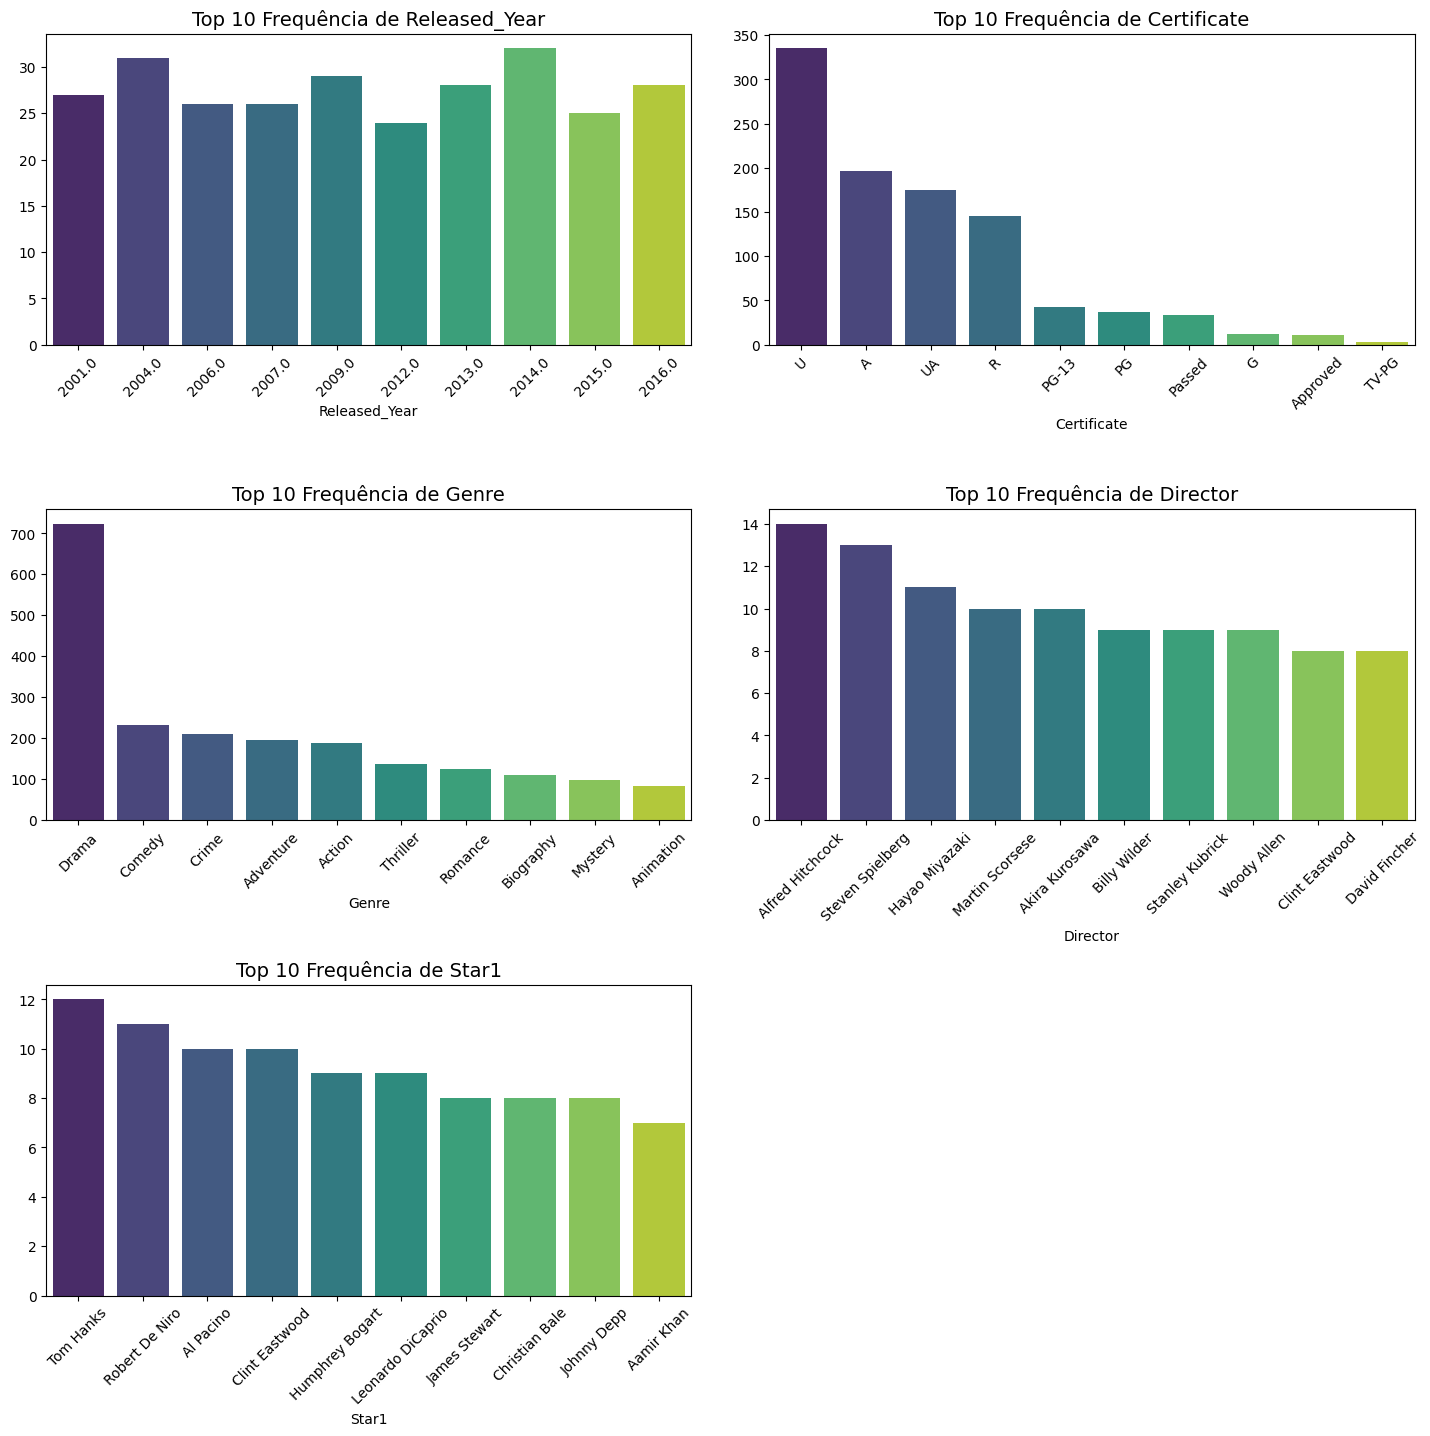

In [26]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

column = 'Released_Year'
data = top_10_data[column]
sns.barplot(x=data.index, y=data.values, palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title(f'Top 10 Frequência de {column}', fontsize=14)
axes[0, 0].tick_params(axis='x', rotation=45)

column = 'Certificate'
data = top_10_data[column]
sns.barplot(x=data.index, y=data.values, palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title(f'Top 10 Frequência de {column}', fontsize=14)
axes[0, 1].tick_params(axis='x', rotation=45)

column = 'Genre'
data = top_10_data[column]
sns.barplot(x=data.index, y=data.values, palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title(f'Top 10 Frequência de {column}', fontsize=14)
axes[1, 0].tick_params(axis='x', rotation=45)

column = 'Director'
data = top_10_data[column]
sns.barplot(x=data.index, y=data.values, palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title(f'Top 10 Frequência de {column}', fontsize=14)
axes[1, 1].tick_params(axis='x', rotation=45)

column = 'Star1'
data = top_10_data[column]
sns.barplot(x=data.index, y=data.values, palette='viridis', ax=axes[2, 0])
axes[2, 0].set_title(f'Top 10 Frequência de {column}', fontsize=14)
axes[2, 0].tick_params(axis='x', rotation=45)

axes[2, 1].axis('off')

plt.tight_layout(pad=3.0)

plt.show()

## Análise bivariada


Gráfico de dispersão

---

O gráfico de dispersão é uma ferramenta visual excelente para nos mostrar a relação entre as variáveis.

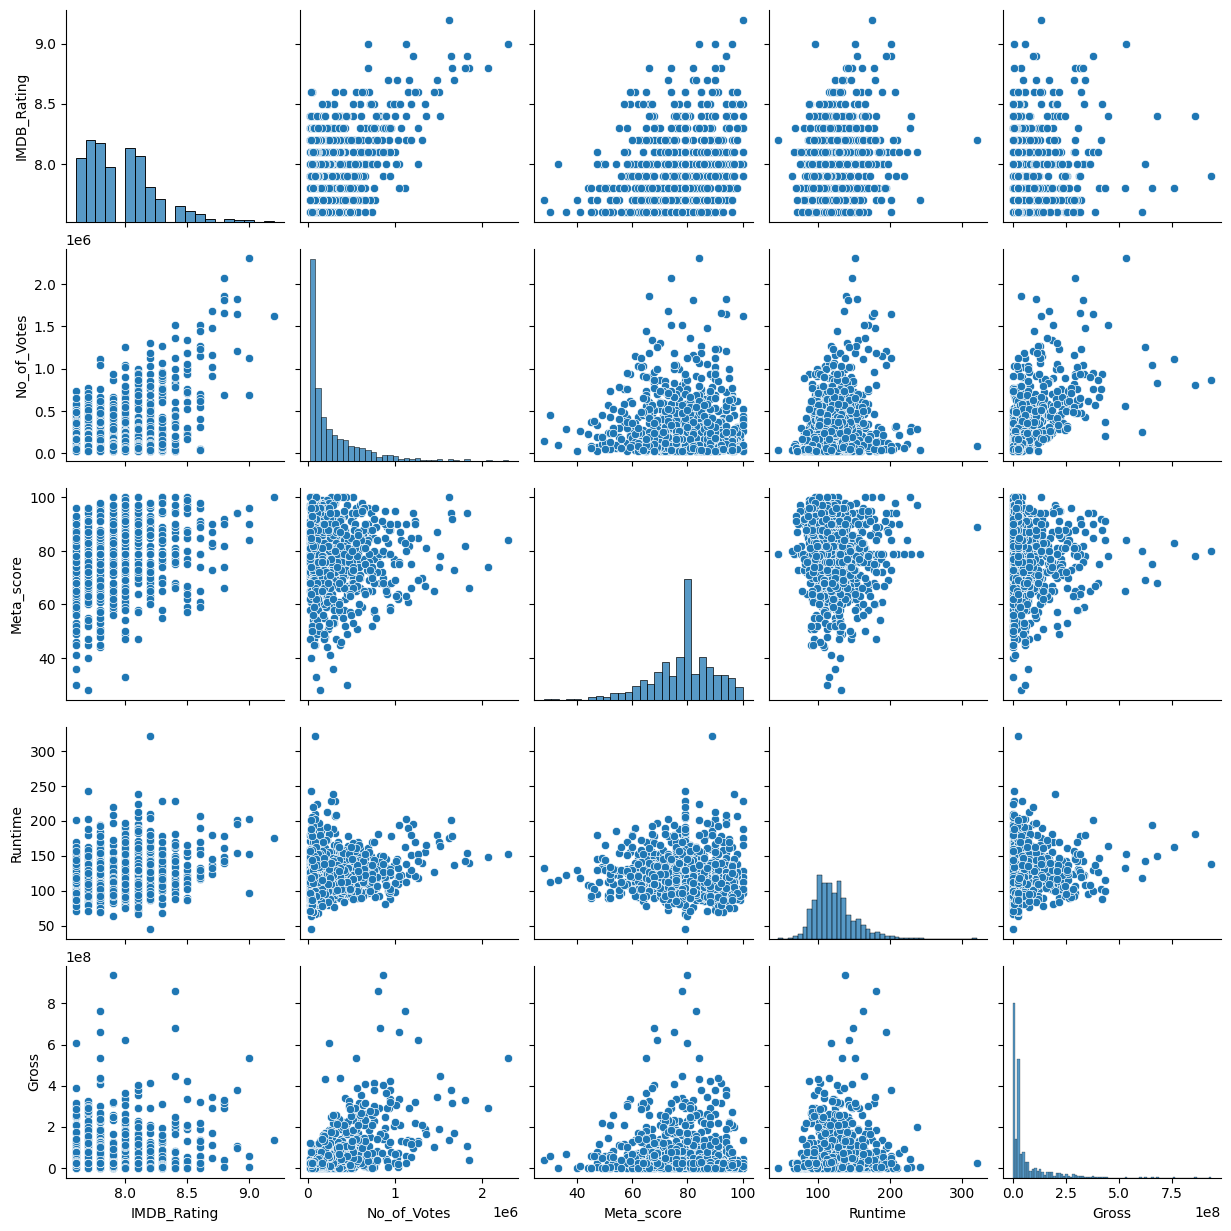

In [27]:
numeric_vars = ['IMDB_Rating', 'No_of_Votes', 'Meta_score', 'Runtime', 'Gross']

sns.pairplot(data=base[numeric_vars])

plt.show()

**INSIGHTS E HIPÓTESES**:

➤ Sobre o faturamento x número de votos, observamos que o gráfico que filmes mais populares tem um faturamento maior. Isso faz total sentido uma vez que o engajamento do público está ligado com o sucesso financeiro do filme.

➤ A nota do público quando comparada com a da crítica também demonstra uma correlação positiva, apesar de verificarmos nas tabelas anteriores que os top filmes não eram semelhantes.

➤ Quanto ao número de votos e a nota do público, verificamos uma certa tendência de acompanhamento, mas bem fraca. Indica muitos filmes não tão populares, mas que tem ótimas notas.

➤ A duração do filme não demonstrou comportamentos ou correlações que chamaram a atenção.

Matriz de correlação

---
Ela é uma ótima ferramenta para mostrar em números o que visualizamos no gráfico de dispersão


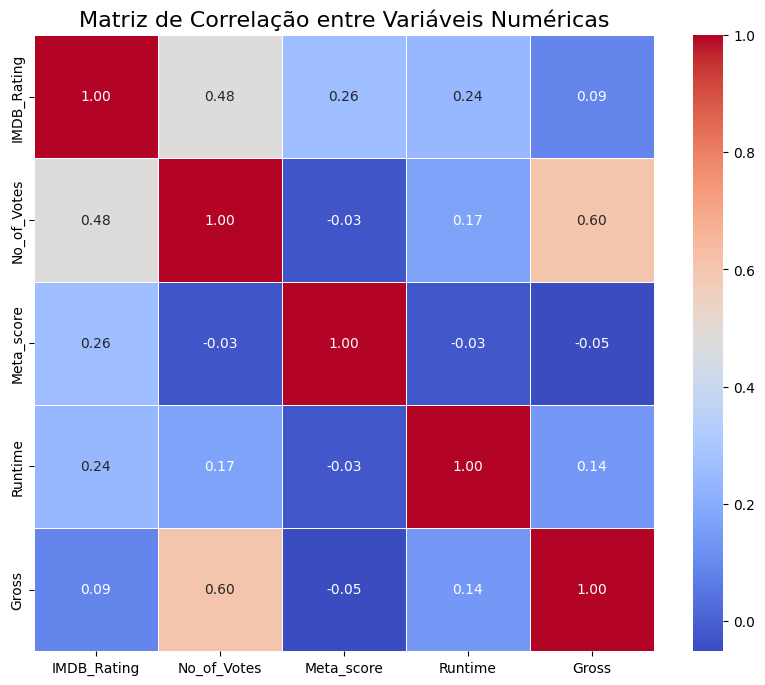

In [28]:
df_numeric = base[numeric_vars]

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=.5
)

plt.title('Matriz de Correlação entre Variáveis Numéricas', fontsize=16)
plt.show()

**INSIGHTS E HIPÓTESES:**

➤ A correlação de 0.60 entre o número de votos e o faturamento nos confirma numericamente a hipótese feita ao ver o gráfico de dispersão, ambas as variáveis estão muito ligadas.

➤ Verificamos que a popularidade e a nota do público tem uma boa correlação (0.48), confirmando a hipóstese que levantamos no gráfico de dispersão.

➤ Verificamos uma correlação fraca da nota do público com a avaliação da crítica e o tempo de duração.

➤ As outras correlações relacionadas ao faturamento nos mostram que avaliação da crítica ou do público não garantem sucesso financeiro.

Gênero x Faturamento

In [29]:
df_genres = base.copy()
df_genres['Genre'] = df_genres['Genre'].str.split(', ')
df_genres = df_genres.explode('Genre')

genre_gross = df_genres.groupby('Genre')['Gross'].sum().sort_values(ascending=False)
print("Top 10 Gêneros mais lucrativos:")
display(genre_gross.head(10))

genre_gross_mean = df_genres.groupby('Genre')['Gross'].mean().sort_values(ascending=False)
print("\nTop 10 Gêneros com maior lucro médio:")
display(genre_gross_mean.head(10))

genre_gross_median = df_genres.groupby('Genre')['Gross'].median().sort_values(ascending=False)
print("\nTop 10 Gêneros com maior lucro mediano:")
display(genre_gross_median.head(10))

Top 10 Gêneros mais lucrativos:


,Gross
Genre,
Drama,3.044838e+10
Adventure,2.878421e+10
Action,2.280742e+10
Comedy,1.323314e+10
Sci-Fi,9.170355e+09
Animation,8.925686e+09
Crime,7.847687e+09
Thriller,7.087780e+09
Fantasy,6.317118e+09



Top 10 Gêneros com maior lucro médio:


,Gross
Genre,
Adventure,1.468582e+08
Sci-Fi,1.368710e+08
Action,1.206742e+08
Animation,1.088498e+08
Fantasy,9.571390e+07
Family,8.300763e+07
Comedy,5.679461e+07
Sport,5.367202e+07
Thriller,5.173562e+07



Top 10 Gêneros com maior lucro mediano:


,Gross
Genre,
Adventure,64898511.00
Sci-Fi,57938693.00
Action,43000000.00
Biography,32572577.00
Family,31637200.00
History,23494165.75
Animation,23457439.50
Comedy,23457439.50
Drama,23457439.50


Gráficos

/tmp/ipython-input-3971741545.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_gross.head(10).index, y=genre_gross.head(10).values, palette='viridis', ax=axes[0, 0])
/tmp/ipython-input-3971741545.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_gross_mean.head(10).index, y=genre_gross_mean.head(10).values, palette='viridis', ax=axes[0, 1])
/tmp/ipython-input-3971741545.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_gross_median.head(10).index, y=genre_gross_median.head(10).values, palette='viridis', ax=axe

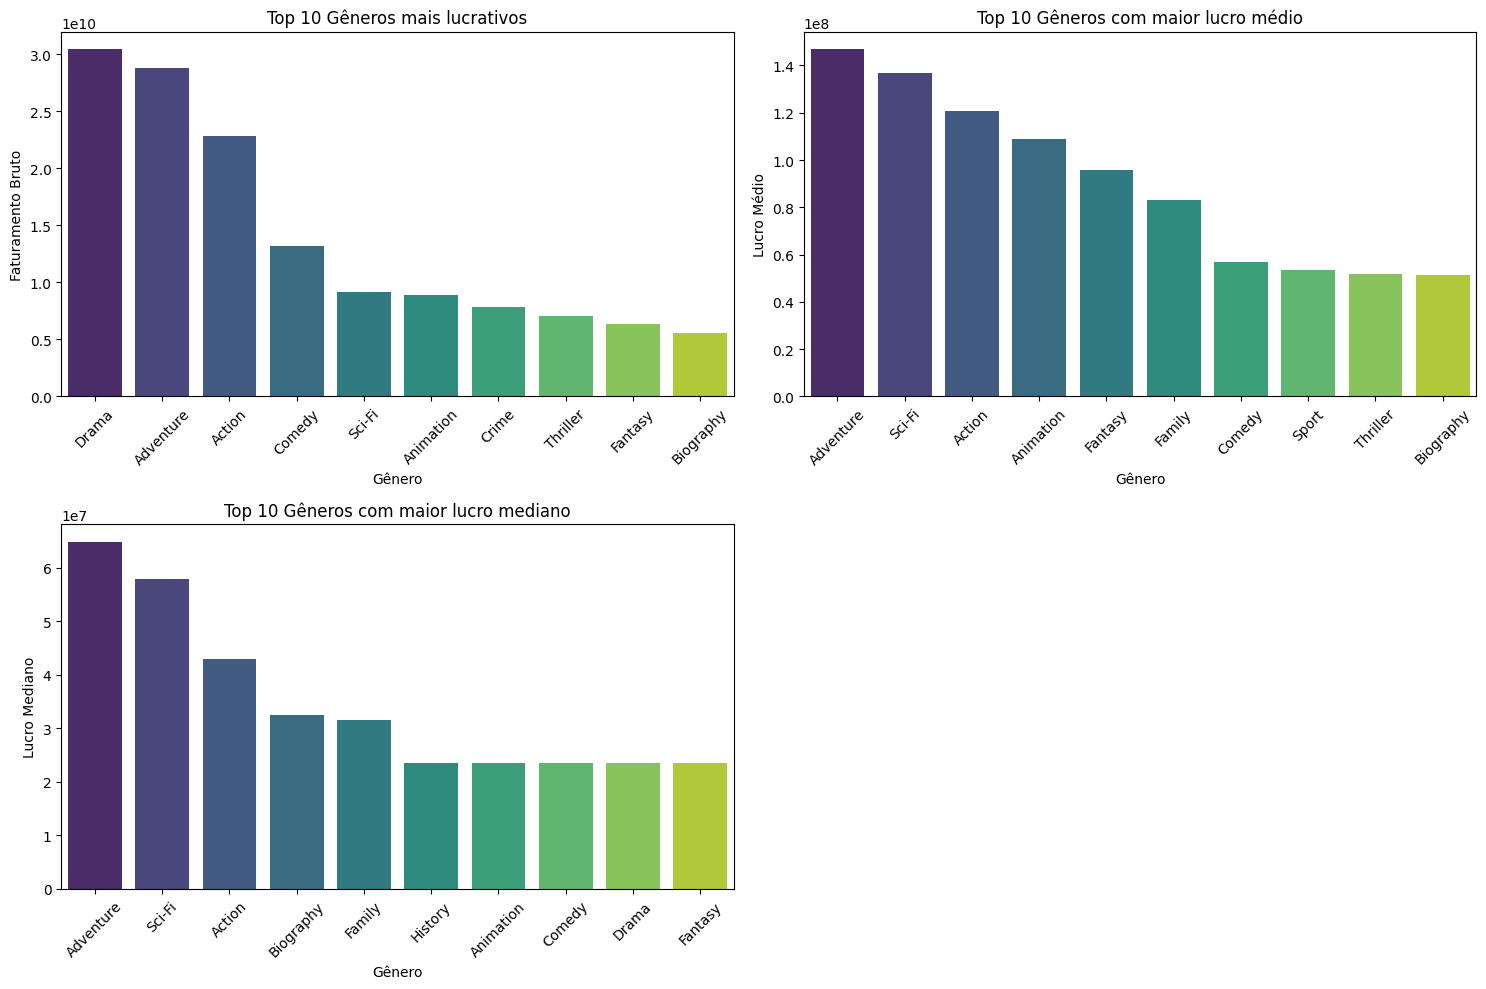

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

sns.barplot(x=genre_gross.head(10).index, y=genre_gross.head(10).values, palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Top 10 Gêneros mais lucrativos')
axes[0, 0].set_xlabel('Gênero')
axes[0, 0].set_ylabel('Faturamento Bruto')
axes[0, 0].tick_params(axis='x', rotation=45)

sns.barplot(x=genre_gross_mean.head(10).index, y=genre_gross_mean.head(10).values, palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Top 10 Gêneros com maior lucro médio')
axes[0, 1].set_xlabel('Gênero')
axes[0, 1].set_ylabel('Lucro Médio')
axes[0, 1].tick_params(axis='x', rotation=45)

sns.barplot(x=genre_gross_median.head(10).index, y=genre_gross_median.head(10).values, palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Top 10 Gêneros com maior lucro mediano')
axes[1, 0].set_xlabel('Gênero')
axes[1, 0].set_ylabel('Lucro Mediano')
axes[1, 0].tick_params(axis='x', rotation=45)

axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

**INSIGHTS E HIPÓTESES:**

➤ Drama é o gênero com mais receita acumulada, mas isso se deve ao grande volume de filmes do gênero.

➤ Quando analisamos o faturamento tanto médio como mediano por filme, os gêneros de ficção científica, aventura e ação são os campeões. Isso confirma a hipótese que fizemos ao analisar os 10 filmes com maior faturamento, esses gêneros são ótimas escolhas se o objetivo for um grande retorno financeiro.

Diretor x Faturamento


In [31]:
director_gross = base.groupby('Director')['Gross'].sum().sort_values(ascending=False)
print("Top 10 Diretores com maior faturamento total:")
display(director_gross.head(10))

director_gross_mean = base.groupby('Director')['Gross'].mean().sort_values(ascending=False)
print("\nTop 10 Diretores com maior faturamento médio:")
display(director_gross_mean.head(10))

director_gross_median = base.groupby('Director')['Gross'].median().sort_values(ascending=False)
print("\nTop 10 Diretores com maior faturamento mediano:")
display(director_gross_median.head(10))

Top 10 Diretores com maior faturamento total:


,Gross
Director,
Steven Spielberg,2.478133e+09
Anthony Russo,2.205039e+09
Christopher Nolan,1.937454e+09
James Cameron,1.748237e+09
Peter Jackson,1.597312e+09
J.J. Abrams,1.423171e+09
Brad Bird,1.099628e+09
Robert Zemeckis,1.049446e+09
David Yates,9.789537e+08



Top 10 Diretores com maior faturamento médio:


,Gross
Director,
Anthony Russo,5.512599e+08
Gareth Edwards,5.321773e+08
J.J. Abrams,4.743903e+08
Josh Cooley,4.340380e+08
Roger Allers,4.227838e+08
Tim Miller,3.630707e+08
James Gunn,3.614949e+08
James Cameron,3.496473e+08
Byron Howard,3.412682e+08



Top 10 Diretores com maior faturamento mediano:


,Gross
Director,
Anthony Russo,543449915.5
Gareth Edwards,532177324.0
Josh Cooley,434038008.0
Roger Allers,422783777.0
Tim Miller,363070709.0
James Gunn,361494850.5
Byron Howard,341268248.0
David Leitch,324591735.0
Joss Whedon,324397032.0


Gráficos

/tmp/ipython-input-1346750047.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=director_gross.head(10).index, y=director_gross.head(10).values, palette='viridis', ax=axes[0, 0])
/tmp/ipython-input-1346750047.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=director_gross_mean.head(10).index, y=director_gross_mean.head(10).values, palette='viridis', ax=axes[0, 1])
/tmp/ipython-input-1346750047.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=director_gross_median.head(10).index, y=director_gross_median.head(10).values, palette

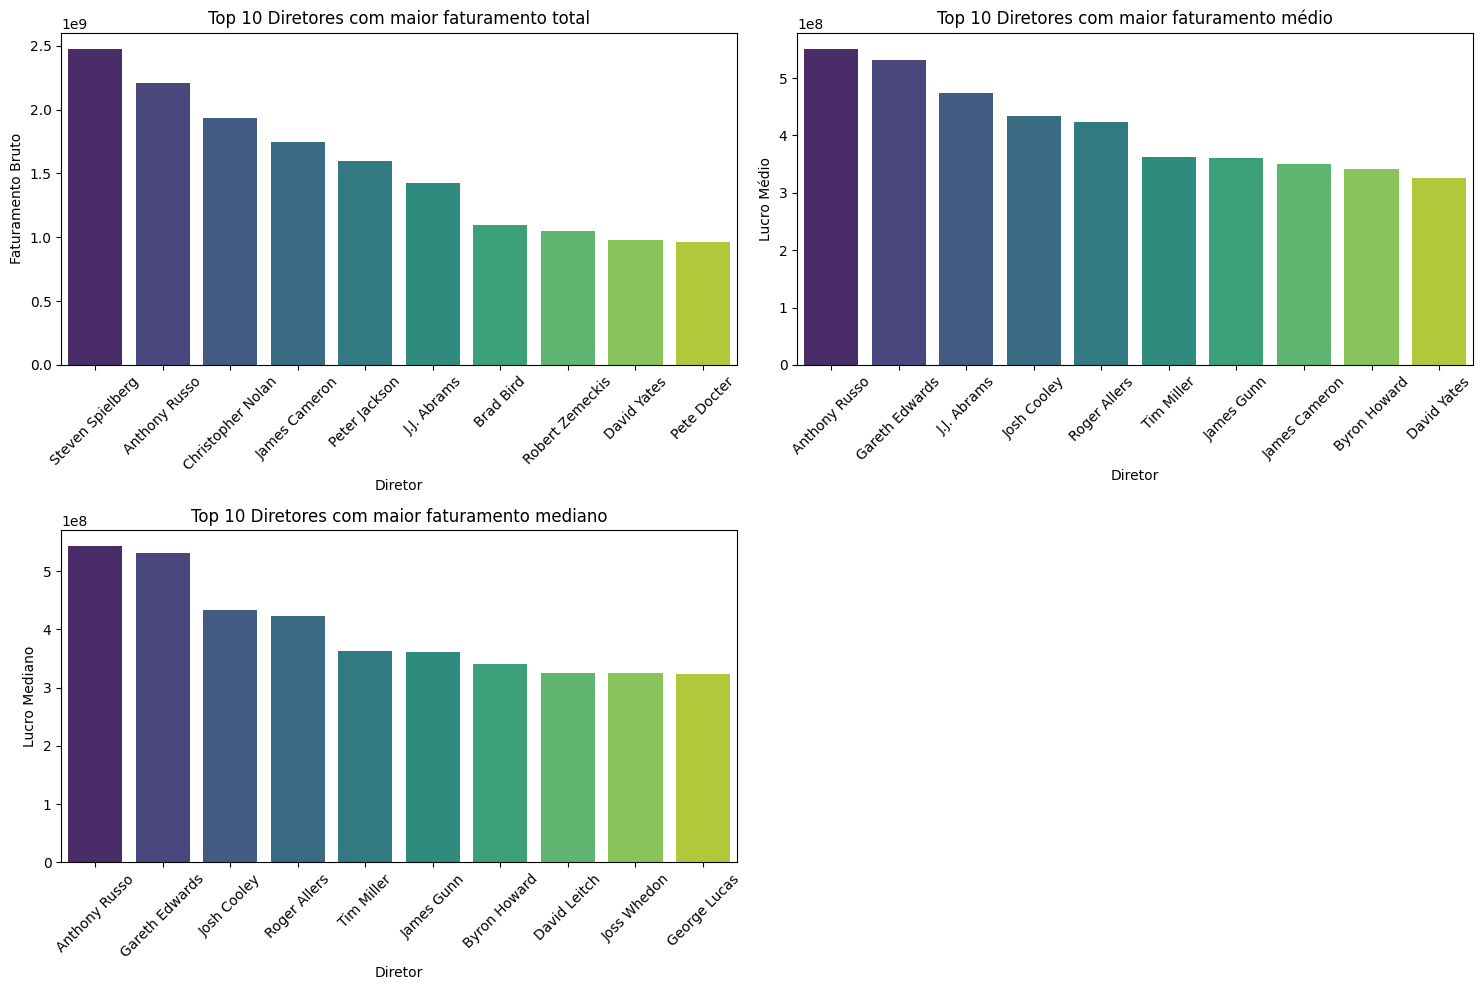

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

sns.barplot(x=director_gross.head(10).index, y=director_gross.head(10).values, palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Top 10 Diretores com maior faturamento total')
axes[0, 0].set_xlabel('Diretor')
axes[0, 0].set_ylabel('Faturamento Bruto')
axes[0, 0].tick_params(axis='x', rotation=45)

sns.barplot(x=director_gross_mean.head(10).index, y=director_gross_mean.head(10).values, palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Top 10 Diretores com maior faturamento médio')
axes[0, 1].set_xlabel('Diretor')
axes[0, 1].set_ylabel('Lucro Médio')
axes[0, 1].tick_params(axis='x', rotation=45)

sns.barplot(x=director_gross_median.head(10).index, y=director_gross_median.head(10).values, palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Top 10 Diretores com maior faturamento mediano')
axes[1, 0].set_xlabel('Diretor')
axes[1, 0].set_ylabel('Lucro Mediano')
axes[1, 0].tick_params(axis='x', rotation=45)

axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

**INSIGHTS E HIPÓSTESE:**

➤ Observamos diretores consgrados e com muitos trabalhos no acumulado total, já na média e mediana verificamos renomados diretores de grandes sucessos de bilheteria.

Estrelas x Faturamento


In [33]:
star1_gross = base.groupby('Star1')['Gross'].sum().sort_values(ascending=False)
print("Top 10 Estrelas com maior faturamento total:")
display(star1_gross.head(10))

star1_gross_mean = base.groupby('Star1')['Gross'].mean().sort_values(ascending=False)
print("\nTop 10 Estrelas com maior faturamento médio:")
display(star1_gross_mean.head(10))

star1_gross_median = base.groupby('Star1')['Gross'].median().sort_values(ascending=False)
print("\nTop 10 Estrelas com maior faturamento mediano:")
display(star1_gross_median.head(10))

Top 10 Estrelas com maior faturamento total:


,Gross
Star1,
Tom Hanks,2.493097e+09
Joe Russo,2.205039e+09
Leonardo DiCaprio,1.877322e+09
Daniel Radcliffe,1.835901e+09
Christian Bale,1.351591e+09
Robert Downey Jr.,1.150720e+09
Elijah Wood,1.035942e+09
Daisy Ridley,9.366622e+08
Mark Hamill,9.223406e+08



Top 10 Estrelas com maior faturamento médio:


,Gross
Star1,
Daisy Ridley,9.366622e+08
Sam Worthington,7.605076e+08
Joe Russo,5.512599e+08
Felicity Jones,5.321773e+08
Henry Thomas,4.351106e+08
Craig T. Nelson,4.350114e+08
Rob Minkoff,4.227838e+08
Robert Downey Jr.,3.835734e+08
Lee Unkrich,3.808433e+08



Top 10 Estrelas com maior faturamento mediano:


,Gross
Star1,
Daisy Ridley,936662225.0
Sam Worthington,760507625.0
Joe Russo,543449915.5
Felicity Jones,532177324.0
Henry Thomas,435110554.0
Craig T. Nelson,435011418.0
Rob Minkoff,422783777.0
Lee Unkrich,380843261.0
Chris Pratt,361494850.5


Gráficos

/tmp/ipython-input-649351852.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=star1_gross.head(10).index, y=star1_gross.head(10).values, palette='viridis', ax=axes[0, 0])
/tmp/ipython-input-649351852.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=star1_gross_mean.head(10).index, y=star1_gross_mean.head(10).values, palette='viridis', ax=axes[0, 1])
/tmp/ipython-input-649351852.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=star1_gross_median.head(10).index, y=star1_gross_median.head(10).values, palette='viridis', ax=axes[1

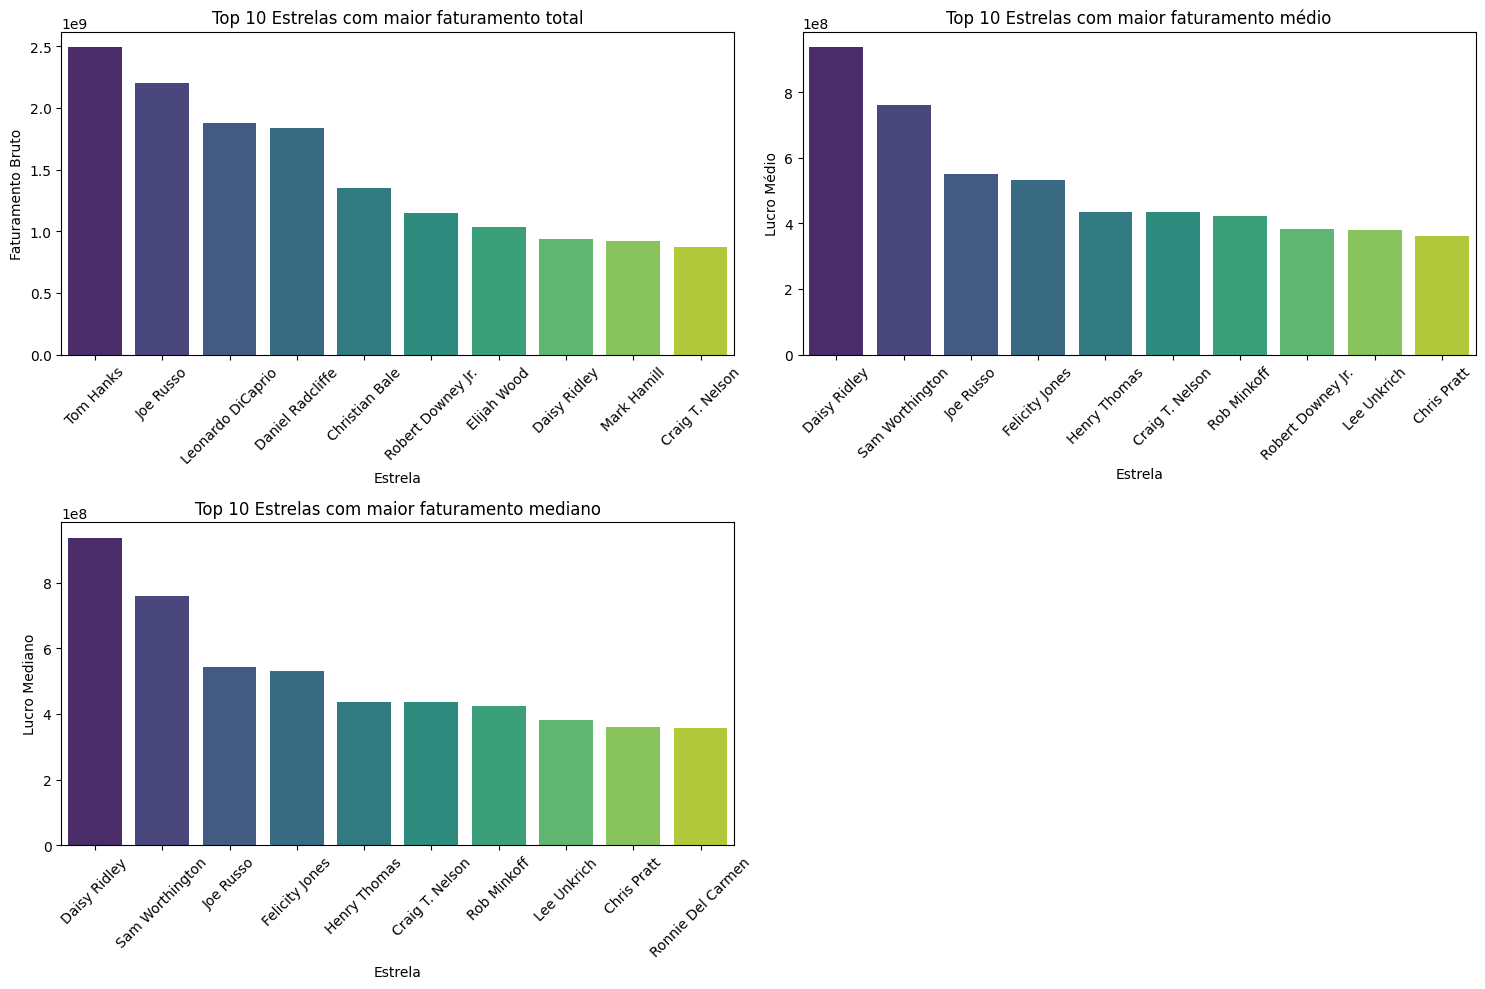

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

sns.barplot(x=star1_gross.head(10).index, y=star1_gross.head(10).values, palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Top 10 Estrelas com maior faturamento total')
axes[0, 0].set_xlabel('Estrela')
axes[0, 0].set_ylabel('Faturamento Bruto')
axes[0, 0].tick_params(axis='x', rotation=45)

sns.barplot(x=star1_gross_mean.head(10).index, y=star1_gross_mean.head(10).values, palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Top 10 Estrelas com maior faturamento médio')
axes[0, 1].set_xlabel('Estrela')
axes[0, 1].set_ylabel('Lucro Médio')
axes[0, 1].tick_params(axis='x', rotation=45)

sns.barplot(x=star1_gross_median.head(10).index, y=star1_gross_median.head(10).values, palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Top 10 Estrelas com maior faturamento mediano')
axes[1, 0].set_xlabel('Estrela')
axes[1, 0].set_ylabel('Lucro Mediano')
axes[1, 0].tick_params(axis='x', rotation=45)

axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

**INSIGHTS E HIPÓTESES:**

➤ Observamos um comportamento muito parecido com a análise dos diretores, no acumulado total temos atores consagrados e consistentes, com muitos projetos, já no faturamento médio e mediano temos atores de grandes sucessos de bilheteria.

➤ É importante destacar que há a presença de diretores na variável 'star1', para uma análise futura é interessante verificar se foi intencional colocando eles como grande estrela pelo sucesso do filme ou se foi um erro e o ator principal deveria estar no lugar.

Classificação indicativa x Faturamento

In [35]:
certificate_gross = base.groupby('Certificate')['Gross'].sum().sort_values(ascending=False)
print("Faturamento total por Certificado:")
display(certificate_gross)

certificate_gross_mean = base.groupby('Certificate')['Gross'].mean().sort_values(ascending=False)
print("\nFaturamento médio por Certificado:")
display(certificate_gross_mean)

certificate_gross_median = base.groupby('Certificate')['Gross'].median().sort_values(ascending=False)
print("\nFaturamento mediano por Certificado:")
display(certificate_gross_median)

Faturamento total por Certificado:


,Gross
Certificate,
UA,2.165828e+10
U,1.970517e+10
A,1.187012e+10
R,3.740168e+09
PG-13,1.534796e+09
PG,7.342653e+08
G,5.428781e+08
Passed,3.830496e+08
Approved,1.589813e+08



Faturamento médio por Certificado:


,Gross
Certificate,
UA,1.237616e+08
A,6.056183e+07
U,5.882142e+07
G,4.523984e+07
PG-13,3.569293e+07
U/A,2.602096e+07
R,2.561759e+07
16,2.345744e+07
TV-14,2.345744e+07



Faturamento mediano por Certificado:


,Gross
Certificate,
UA,49100000.00
A,42389449.00
U/A,26020957.00
G,25369473.25
PG,23457439.50
TV-14,23457439.50
16,23457439.50
Approved,23457439.50
U,23457439.50


Gráficos

/tmp/ipython-input-2403602549.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=certificate_gross.index, y=certificate_gross.values, palette='viridis', ax=axes[0, 0])
/tmp/ipython-input-2403602549.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=certificate_gross_mean.index, y=certificate_gross_mean.values, palette='viridis', ax=axes[0, 1])
/tmp/ipython-input-2403602549.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=certificate_gross_median.index, y=certificate_gross_median.values, palette='viridis', ax=axes[1, 0])


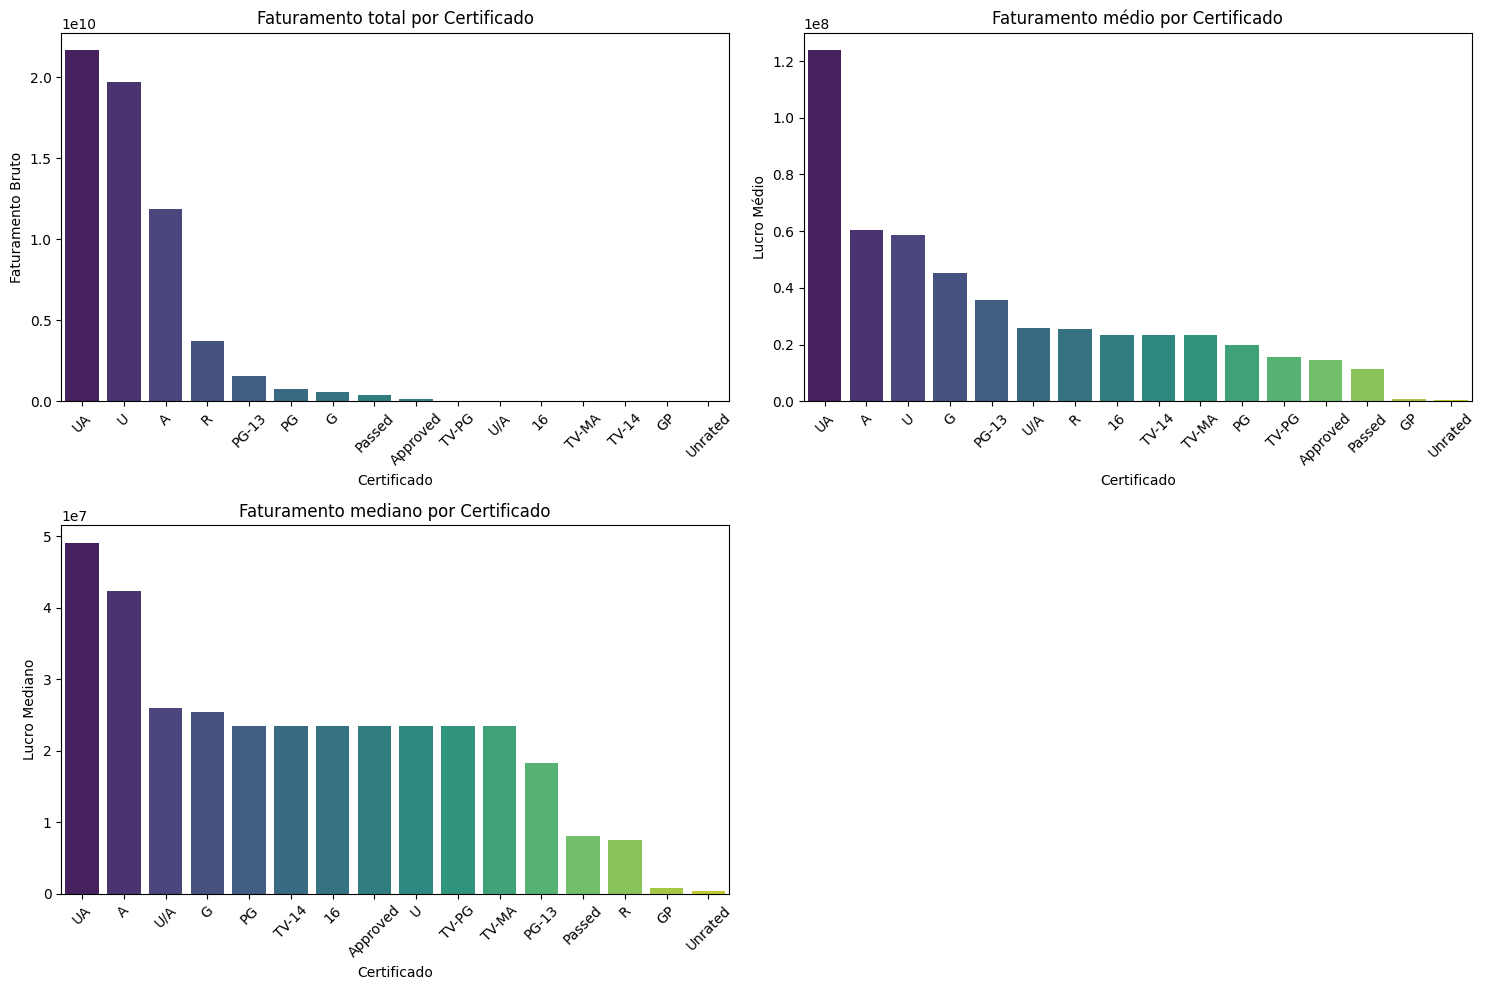

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

sns.barplot(x=certificate_gross.index, y=certificate_gross.values, palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Faturamento total por Certificado')
axes[0, 0].set_xlabel('Certificado')
axes[0, 0].set_ylabel('Faturamento Bruto')
axes[0, 0].tick_params(axis='x', rotation=45)

sns.barplot(x=certificate_gross_mean.index, y=certificate_gross_mean.values, palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Faturamento médio por Certificado')
axes[0, 1].set_xlabel('Certificado')
axes[0, 1].set_ylabel('Lucro Médio')
axes[0, 1].tick_params(axis='x', rotation=45)

sns.barplot(x=certificate_gross_median.index, y=certificate_gross_median.values, palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Faturamento mediano por Certificado')
axes[1, 0].set_xlabel('Certificado')
axes[1, 0].set_ylabel('Lucro Mediano')
axes[1, 0].tick_params(axis='x', rotation=45)

axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

**INSIGHTS E HIPÓTESES:**

➤ A análise do faturamento por classificação indicativa nos confirma a hipótese que levantamos de filmes com público mais abrangente obterem um lucro maior se tornando uma ótima opção para a PProductions

# 4. Respondendo às perguntas do desafio

---
**PERGUNTAS:**

➤ Qual filme você recomendaria para uma pessoa que você não conhece?

➤ Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?

➤ Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

➤ Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

➤ Faça a previsão do filme 'The ShawShank Redemption'

## 4.1 Qual filme você recomendaria para uma pessoa que você não conhece?

In [37]:
filme_escolhido = base[base['Series_Title'] == 'The Dark Knight']

colunas_relevantes = [
    'Series_Title', 'Released_Year', 'Genre', 'Runtime',
    'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross'
]
print("Ficha Técnica do Filme Recomendado")
display(filme_escolhido[colunas_relevantes].T)

Ficha Técnica do Filme Recomendado


,1
Series_Title,The Dark Knight
Released_Year,2008.0
Genre,"Action, Crime, Drama"
Runtime,152
IMDB_Rating,9.0
Meta_score,84.0
No_of_Votes,2303232
Gross,534858444.0


Com base nos critérios de popularidade, aclamação da mídia e faturamento, eu indicaria o filme:

➤ **The Dark Knight**

Ele é o filme mais popular com 2.3 milhões de votos, está entre os 10 maiores faturamentos com 534 milhões de dólares arrecadados e entre as 10 melhores avaliações do público com nota 9 no IMDB. Um filme que já foi amplamente aprovado por a maior parte do público tem mais chances de ser amado por uma pessoa desconhecida também.

In [38]:
nota_filme = filme_escolhido['IMDB_Rating'].iloc[0]
votos_filme = filme_escolhido['No_of_Votes'].iloc[0]
faturamento_filme = filme_escolhido['Gross'].iloc[0]

ranking_nota = (base['IMDB_Rating'] < nota_filme).mean() * 100
ranking_votos = (base['No_of_Votes'] < votos_filme).mean() * 100
ranking_faturamento = (base['Gross'] < faturamento_filme).mean() * 100

print(f"Posição de 'The Dark Knight' no Dataset")
print(f"Nota IMDB: {nota_filme} (maior que {ranking_nota:.2f}% dos filmes)")
print(f"Número de Votos: {votos_filme} (maior que {ranking_votos:.2f}% dos filmes)")
print(f"Faturamento: ${faturamento_filme:,.2f} (maior que {ranking_faturamento:.2f}% dos filmes)")

Posição de 'The Dark Knight' no Dataset
Nota IMDB: 9.0 (maior que 99.60% dos filmes)
Número de Votos: 2303232 (maior que 99.90% dos filmes)
Faturamento: $534,858,444.00 (maior que 99.20% dos filmes)


## 4.2 Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?

Após a análise exploratória verificamos que alguns fatores tem um impacto maior na expectativa de faturamento de um filme, são eles:

➤ Popularidade (No_of_Votes)

➤ Gênero

➤ Atores e diretores

➤ Clasificação etária


**POPULARIDADE (No_of_Votes)**

In [39]:
num_vars = ['IMDB_Rating', 'No_of_Votes', 'Meta_score', 'Runtime', 'Gross']
correlation_with_gross = base[num_vars].corr()['Gross'].sort_values(ascending=False)

print("Correlação das Variáveis Numéricas com o Faturamento (Gross)")
display(correlation_with_gross)

Correlação das Variáveis Numéricas com o Faturamento (Gross)


,Gross
Gross,1.000000
No_of_Votes,0.602705
Runtime,0.138628
IMDB_Rating,0.088139
Meta_score,-0.051865


No gráfico de dispersão e na matriz de correlação apresentados na EDA já haviamos indicado que a correlação mais forte que existia com o faturamento era a popularidade. Com uma correlação de 0.60, 'No_of_Votes' está altamente ligada com o sucesso financeiro de um filme.

**GÊNERO**

In [40]:
df_genres_exp = base.assign(Genre=base['Genre'].str.split(', ')).explode('Genre')

median_gross_by_genre = df_genres_exp.groupby('Genre')['Gross'].median().sort_values(ascending=False)

print("Top 10 Gêneros por Faturamento Mediano")
display(median_gross_by_genre.head(10))

Top 10 Gêneros por Faturamento Mediano


,Gross
Genre,
Adventure,64898511.00
Sci-Fi,57938693.00
Action,43000000.00
Biography,32572577.00
Family,31637200.00
History,23494165.75
Animation,23457439.50
Comedy,23457439.50
Drama,23457439.50


Como já haviamos mostrado anteriormente os filmes que preecnchem o top 10 dos maiores faturamentos, os que tem o maior faturamento médio e mediano são os com gêneros: Adventure, Action e Sci-Fi. Portanto, se a PProductions quiser apostar em filmes com potencial de faturamento alto, essas são ótimas escolhas de gênero.

**ATORES E DIRETORES**

O nome de atores e diretores carrega a expectativa do público para consumir o produto, como verificamos na análise de atores e diretores com maior lucro total, médio e mediano.

In [41]:
median_gross_by_director = base.groupby('Director')['Gross'].median().sort_values(ascending=False)
print("Top 10 Diretores por Faturamento Mediano")
display(median_gross_by_director.head(10))

median_gross_by_star = base.groupby('Star1')['Gross'].median().sort_values(ascending=False)
print("\nTop 10 Estrelas por Faturamento Mediano")
display(median_gross_by_star.head(10))

Top 10 Diretores por Faturamento Mediano


,Gross
Director,
Anthony Russo,543449915.5
Gareth Edwards,532177324.0
Josh Cooley,434038008.0
Roger Allers,422783777.0
Tim Miller,363070709.0
James Gunn,361494850.5
Byron Howard,341268248.0
David Leitch,324591735.0
Joss Whedon,324397032.0



Top 10 Estrelas por Faturamento Mediano


,Gross
Star1,
Daisy Ridley,936662225.0
Sam Worthington,760507625.0
Joe Russo,543449915.5
Felicity Jones,532177324.0
Henry Thomas,435110554.0
Craig T. Nelson,435011418.0
Rob Minkoff,422783777.0
Lee Unkrich,380843261.0
Chris Pratt,361494850.5


Observamos nas listas diretores e estrelas que tem no portfólio mega-franquias como Marvel e Star Wars.

**CLASSIFICAÇÃO ETÁRIA**

Verificamos na análise exploratória que filmes com classificações etárias para um público mais amplo tendem a ser mais lucrativos.

In [42]:
median_gross_by_certificate = base.groupby('Certificate')['Gross'].median().sort_values(ascending=False)

print("Faturamento Mediano por Classificação Etária")
display(median_gross_by_certificate.head(10))

Faturamento Mediano por Classificação Etária


,Gross
Certificate,
UA,49100000.00
A,42389449.00
U/A,26020957.00
G,25369473.25
PG,23457439.50
TV-14,23457439.50
16,23457439.50
Approved,23457439.50
U,23457439.50


Classificações como UA lideram o faturamento.

## 4.3 Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

Com a coluna Overview podemos tirar vários insghts interessantes como os temas mais comuns nos filmes de sucesso. Já havia visto projetos com NLP que utilizavam nuvem de palavras por ser um método visual e eficaz, decidi utilizá-la para apresentar as palavras mais comuns.

Nuvem de palavras

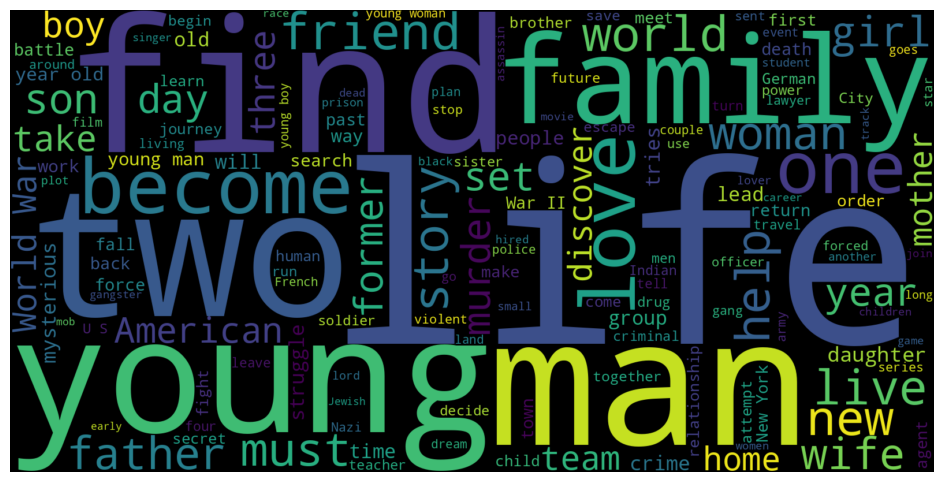

In [43]:
from wordcloud import WordCloud

text_overview = " ".join(overview for overview in base.Overview.dropna())

wordcloud = WordCloud(
    max_words=150,
    background_color="black",
    width=1600,
    height=800
).generate(text_overview)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**INSIGHTS E HIPÓTESES:**

➤ Conseguimos observar palavras muito ligadas a relações e emoções humanas como: family, young, friend, life, mother, son, brother e girl. Isso demonstra que temas assim podem se conectar mais com o público.

➤ Também observamos palavras ligadas a conflitos e histórias como: crime, story, World War, office, secret, police e etc...

**INFERINDO O GÊNERO**

Sobre inferir o gênero é completamente possível, visto que vimos que as palavras das sinopses são ligadas a temas centrais das histórias e eles mudam de acordo com o gênero do filme.

Descobrir o gênero é um problema de classificação multiclasse, visto que temos as entradas que seriam as sinopses e com elas tentariamos descobrir a qual classe(gênero) aquele filme pertence. Para demonstrar isso, criei um classificador simples usando o Naive Bayes que para linguagem natural ele lida muito bem.

Importante destacar que adotei alguns critérios, como os filmes podem ter mais de um gênero, adotei o primeiro gênero como principal. Também usei a biblioteca scikit-learn (TfidfVectorizer) para vetorizar as palavras de cada overview.

Classificador de gêneros

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

df_genre_task = base.dropna(subset=['Overview', 'Genre']).copy()

df_genre_task['Main_Genre'] = df_genre_task['Genre'].apply(lambda x: x.split(',')[0])

X_overview = df_genre_task['Overview']
y_genre = df_genre_task['Main_Genre']

X_genre_train, X_genre_test, y_genre_train, y_genre_test = train_test_split(
    X_overview,
    y_genre,
    test_size=0.3,
    random_state=42,
)

genre_vectorizer = TfidfVectorizer(stop_words='english', max_features=2000)

X_train_vec = genre_vectorizer.fit_transform(X_genre_train)

X_test_vec = genre_vectorizer.transform(X_genre_test)

genre_model = MultinomialNB()
genre_model.fit(X_train_vec, y_genre_train)

y_pred_genre = genre_model.predict(X_test_vec)

accuracy_genre = accuracy_score(y_genre_test, y_pred_genre)

print(f"Acurácia: {accuracy_genre:.2%}")


Acurácia: 31.67%


➤ 31.67% pode parecer uma acurácia baixa, porém para algo tão abstrato, considerando que foi um modelo simples apenas para exemplo e com uma análise superficial, foi um ótimo resultado para mostrar que é possível determinar o gênero com a overview do filme.



## 4.4 Explique como você faria a previsão da nota do imdb a partir dos dados.
➤ Quais variáveis e/ou suas transformações você utilizou e por quê?

➤ Qual tipo de problema estamos resolvendo (regressão, classificação)?

➤ Qual modelo melhor se aproxima dos dados e quais seus prós e contras?

➤ Qual medida de performance do modelo foi escolhida e por quê?

---

Inicialmente, é preciso entender qual o tipo de problema que estamos lidando, como queremos prever um valor númérico contínuo, estamos falando de um caso de regressão. Para fazer esse processo e responder às perguntas, dividi em algumas etapas:

➤ Feature Engineering (escolha das features e transformações)

➤ Divisão dos dados (teste e treino)

➤ Treinamento e comparação

➤ Seleção do melhor modelo



**Feature Engineering**

---
Aqui observamos as tranformações e variáveis que utilizei:

➤ Optei por remover algumas variáveis, como:

'Unnamed: 0', 'Series_Title' e 'Overview' pois elas são apenas identificadores, não nos fornecem uma informação que impacta na nota IMDB.

'Gross' e 'No_of_Votes' foram removidas pois a versão delas que passou por transformação logarítmas permanecerão, visto que elas com a distribuição normalizada estão em uma escala melhor para nosso modelo compreender.

'IMDB_Rating' foi separada por ser nossa variável alvo, a saída do modelo.

➤ Fiz algumas transformações que eram necessárias, como:

'Gross' e 'No_of_Votes'que passaram por transformação logarítimica, como apresentado anteriormente.

Como um filme pode ter mais de um gênero, criei uma coluna binária para cada um, assim o modelo poderá analisar o impacto de cada um de forma individual.

Como diretor e estrelas podem ter muitos nomes diferentes, peguei os 20 mais frequentes que podem ter um impacto maior e classificquei o restante em uma coluna "Other". Dessa forma evitamos que o modelos se especifique muito.

Após isso, a coluna 'Certficate' e as outras variáveis categóricas foram transformadas em valores numéricos, pois o modelo só recebe números.

Também apliquei um escalonamento em todas as variáveis ao final do processo, para que variáveis com maiores escalas não desequilibrassem o modelo.


Eliminando colunas não relevantes

In [45]:
base.columns

Index(['Unnamed: 0', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime',
       'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1',
       'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross', 'No_of_Votes_log',
       'Gross_log'],
      dtype='object')

In [46]:
colunas_para_remover = [
    'Unnamed: 0',
    'Series_Title',
    'Overview',
    'IMDB_Rating',
    'No_of_Votes',
    'Gross'
]

X = base.drop(columns=colunas_para_remover)
y = base['IMDB_Rating']

display(X.head())

display(y.head())

,Released_Year,Certificate,Runtime,Genre,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes_log,Gross_log
0,1972.0,A,175,"Crime, Drama",100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,14.298164,18.720537
1,2008.0,UA,152,"Action, Crime, Drama",84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,14.649824,20.097513
2,1974.0,A,202,"Crime, Drama",90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,13.937687,17.863811
3,1957.0,U,96,"Crime, Drama",96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,13.444224,15.287983
4,2003.0,U,201,"Action, Adventure, Drama",94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,14.311888,19.749997


,IMDB_Rating
0,9.2
1,9.0
2,9.0
3,9.0
4,8.9


Transformando variáveis categóricas

In [47]:
genre_dummies = X['Genre'].str.get_dummies(sep=', ')

X = pd.concat([X, genre_dummies], axis=1)

X = X.drop('Genre', axis=1)

print(X.shape)
display(X[['Action', 'Adventure', 'Sci-Fi']].head())

(999, 32)


,Action,Adventure,Sci-Fi
0,0,0,0
1,1,0,0
2,0,0,0
3,0,0,0
4,1,1,0


In [48]:
high_cardinality_features = ['Director', 'Star1', 'Star2', 'Star3', 'Star4']

for col in high_cardinality_features:
    top_20 = X[col].value_counts().nlargest(20).index

    X[col] = X[col].where(X[col].isin(top_20), 'Other')

display(X['Director'].value_counts())

,count
Director,
Other,831
Alfred Hitchcock,14
Steven Spielberg,13
Hayao Miyazaki,11
Akira Kurosawa,10
Martin Scorsese,10
Billy Wilder,9
Woody Allen,9
Stanley Kubrick,9


In [49]:
X_processed = pd.get_dummies(X, drop_first=True)

display(X_processed.head())

,Released_Year,Runtime,Meta_score,No_of_Votes_log,Gross_log,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Certificate_A,Certificate_Approved,Certificate_G,Certificate_GP,Certificate_PG,Certificate_PG-13,Certificate_Passed,Certificate_R,Certificate_TV-14,Certificate_TV-MA,Certificate_TV-PG,Certificate_U,Certificate_U/A,Certificate_UA,Certificate_Unrated,Director_Alfonso Cuarón,Director_Alfred Hitchcock,Director_Billy Wilder,Director_Charles Chaplin,Director_Christopher Nolan,Director_Clint Eastwood,Director_David Fincher,Director_Hayao Miyazaki,Director_Howard Hawks,Director_Ingmar Bergman,Director_Joel Coen,Director_Martin Scorsese,Director_Other,Director_Quentin Tarantino,Director_Richard Linklater,Director_Ridley Scott,Director_Rob Reiner,Director_Stanley Kubrick,Director_Steven Spielberg,Director_Woody Allen,Star1_Al Pacino,Star1_Bruce Willis,Star1_Cary Grant,Star1_Charles Chaplin,Star1_Christian Bale,Star1_Clint Eastwood,Star1_Daniel Radcliffe,Star1_Denzel Washington,Star1_Ethan Coen,Star1_Ethan Hawke,Star1_Humphrey Bogart,Star1_Jake Gyllenhaal,Star1_James Stewart,Star1_Johnny Depp,Star1_Leonardo DiCaprio,Star1_Other,Star1_Robert De Niro,Star1_Tom Cruise,Star1_Tom Hanks,Star1_Toshirô Mifune,Star2_Brad Pitt,Star2_Chris Evans,Star2_Christian Bale,Star2_Diane Keaton,Star2_Ed Harris,Star2_Emma Watson,Star2_Gary Oldman,Star2_Grace Kelly,Star2_Ian McKellen,Star2_Julie Delpy,Star2_Kate Winslet,Star2_Katharine Hepburn,Star2_Matt Damon,Star2_Meryl Streep,Star2_Other,Star2_Patricia Arquette,Star2_Robert Downey Jr.,Star2_Samantha Morton,Star2_Steve Carell,Star2_Tim Allen,Star3_Carrie Fisher,Star3_Chiwetel Ejiofor,Star3_Christopher Plummer,Star3_Edward Norton,Star3_Frances McDormand,Star3_Jennifer Connelly,Star3_Joe Pesci,Star3_John Goodman,Star3_Katrin Cartlidge,Star3_Kevin Bacon,Star3_Michael Madsen,Star3_Morgan Freeman,Star3_Nawazuddin Siddiqui,Star3_Other,Star3_Rachel McAdams,Star3_Robert De Niro,Star3_Rupert Grint,Star3_Samuel L. Jackson,Star3_Scarlett Johansson,Star3_Vera Miles,Star4_Bryce Dallas Howard,Star4_Catherine Keener,Star4_Domhnall Gleeson,Star4_Gene Lockhart,Star4_Gunnar Björnstrand,Star4_John Castle,Star4_Josh Brolin,Star4_Kerry Washington,Star4_Mark Ruffalo,Star4_Melissa Leo,Star4_Michael Caine,Star4_Michael Gambon,Star4_Other,Star4_Robert Patrick,Star4_Rod Steiger,Star4_Rooney Mara,Star4_Sanya Malhotra,Star4_Sharman Joshi,Star4_Ulrich Tukur,Star4_Ward Bond
0,1972.0,175,100.0,14.298164,18.720537,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,2008.0,152,84.0,14.649824,20.097513,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,F

**Criando os modelos**

➤ Inicialmente separei os dados de treino e de teste, para que o modelo não se especialize ao datset devemos evitar o vazmentos de dados entre os conjuntos.

➤ Realizei o escalonamento que mencionei

➤ Criei uma função para exibir as métricas de cada modelo mais facilmente

➤ As métricas escolhidas são extremamente comuns e conhecidas para avaliar modelos de regressão:

R² (Coeficiente de Determinação): É a métrica principal, a proporção da variância, indica o quão bem o modelo se encaixa em um conjunto de dados, ou seja, quanto mais próximo de 1 melhor, pois o modelo consegue explicar melhor os fatores que variam o alvo.

MAE (Erro Médio Absoluto): Ela é uma métrica muito objetiva, é calculada a partir da média dos erros absolutos, ou seja, utilizamos o módulo de cada erro para evitar a subestimação.

RMSE (Raiz do Erro Quadrático Médio): É a métrica mais padrão para problemas de regressão, é calculada usando a raiz quadrada da média dos quadrados dos erros

Imports


In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score




Preparação


In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    X_processed,
    y,
    test_size=0.2,
    random_state=42
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


def evaluate_model(model_name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f"{model_name}")
    print(f"MAE (Erro Médio Absoluto): {mae:.4f}")
    print(f"RMSE (Raiz do Erro Quadrático Médio): {rmse:.4f}")
    print(f"R² (Coeficiente de Determinação): {r2:.4f}\n")

    return [mae, rmse, r2]




**Treinamento e teste**


Escolhi três modelos muito conhecidos:

Regressão Linear que é o mais básico, o SVR que também é um modelo intermediário e o Random Forest que é um modelo mais abstrato que os dois anteriores, porém mais robusto.

In [52]:
all_results = []


lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
lr_metrics = evaluate_model('Regressão Linear', y_test, y_pred_lr)
all_results.append(['Regressão Linear'] + lr_metrics)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
rf_metrics = evaluate_model('Random Forest', y_test, y_pred_rf)
all_results.append(['Random Forest'] + rf_metrics)


svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)
svr_metrics = evaluate_model('SVR', y_test, y_pred_svr)
all_results.append(['SVR'] + svr_metrics)

Regressão Linear
MAE (Erro Médio Absoluto): 0.2010
RMSE (Raiz do Erro Quadrático Médio): 0.2478
R² (Coeficiente de Determinação): 0.0644

Random Forest
MAE (Erro Médio Absoluto): 0.1499
RMSE (Raiz do Erro Quadrático Médio): 0.1940
R² (Coeficiente de Determinação): 0.4265

SVR
MAE (Erro Médio Absoluto): 0.1984
RMSE (Raiz do Erro Quadrático Médio): 0.2431
R² (Coeficiente de Determinação): 0.0998



**Resultados**

---
O modelo que melhor se aproximou dos dados foi o **Random Forest**, o resultado já era esperado visto que ele é mais robusto e entende relações mais complexas que os outros dois:

Prós:

➤ O R² de 0.4265 (42.65%) é o número mais importante, ele mostra que o Random Forest entende melhor o conjunto dos dados, conseguindo explicar mais de quatro vezes a variabilidade da nota do IMDB em comparação com o SVR (9.98%) e quase sete vezes mais que a Regressão Linear (6.44%).

➤ O erro do modelo (MAE de 0.1499) também é muito menor, indicando que suas previsões são muito mais próximas do valor real.

Contras:

➤ O Random Forest é muito bom, porém ele é considerado um modelo do tipo "caixa-preta", pois é mais difícil interpretar o caminho que ele levou para uma previsão específica.

➤ O Random Forest por ser mais robusto, tem um custo computacional maior do que modelos mais simples. Para outros problemas mais lineares, talvez os outros dois sejam mais eficientes.



In [53]:
df_results = pd.DataFrame(all_results, columns=['Modelo', 'MAE', 'RMSE', 'R²'])

df_results_sorted = df_results.sort_values(by='R²', ascending=False).reset_index(drop=True)

display(df_results_sorted)

,Modelo,MAE,RMSE,R²
0,Random Forest,0.149905,0.194028,0.426501
1,SVR,0.198361,0.243096,0.099757
2,Regressão Linear,0.201040,0.247823,0.064405


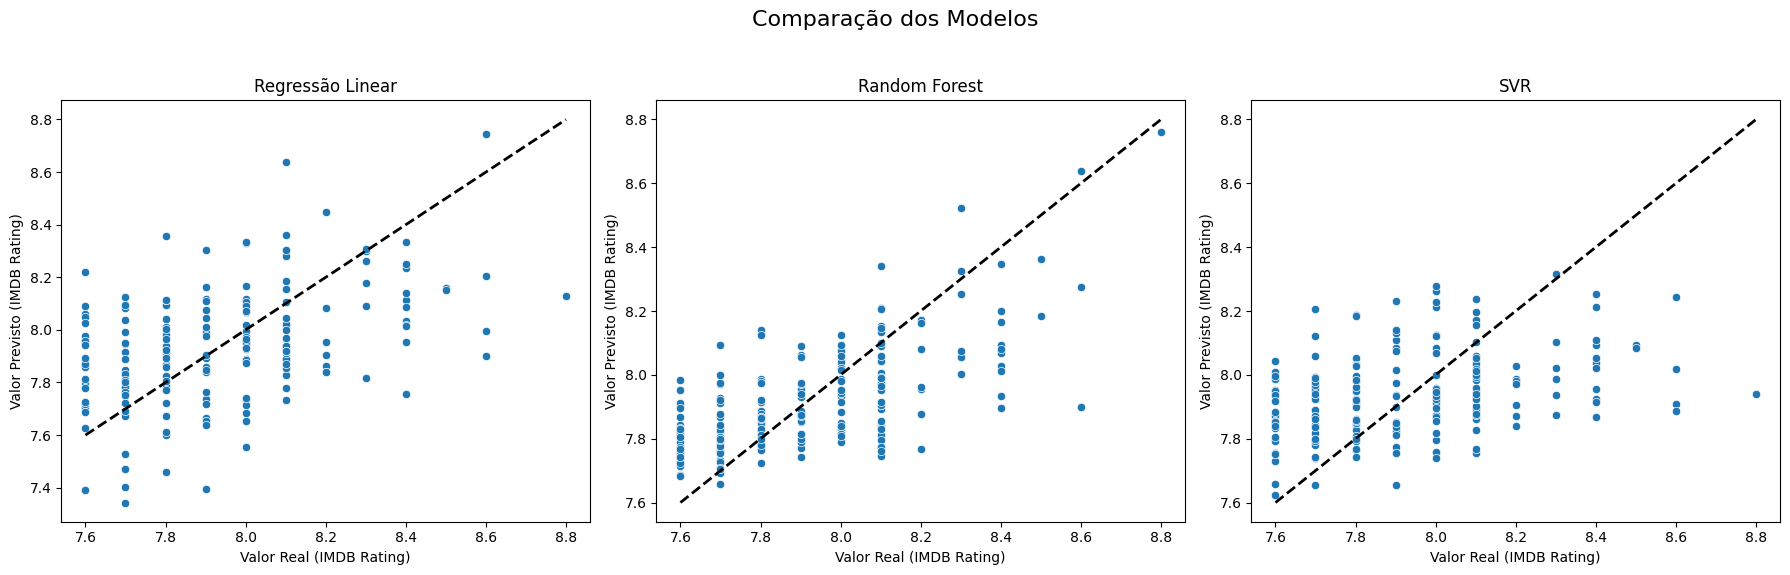

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
fig.suptitle('Comparação dos Modelos', fontsize=16)

sns.scatterplot(x=y_test, y=y_pred_lr, ax=axes[0])
axes[0].set_title('Regressão Linear')
axes[0].set_xlabel('Valor Real (IMDB Rating)')
axes[0].set_ylabel('Valor Previsto (IMDB Rating)')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

sns.scatterplot(x=y_test, y=y_pred_rf, ax=axes[1])
axes[1].set_title('Random Forest')
axes[1].set_xlabel('Valor Real (IMDB Rating)')
axes[1].set_ylabel('Valor Previsto (IMDB Rating)')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

sns.scatterplot(x=y_test, y=y_pred_svr, ax=axes[2])
axes[2].set_title('SVR')
axes[2].set_xlabel('Valor Real (IMDB Rating)')
axes[2].set_ylabel('Valor Previsto (IMDB Rating)')
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 4.5 Prevendo a nota IMDB do filme 'The Shawshank Redemption'

---
O desafio propõe a previsão da nota para um filme específico, para obtermos a previsão, os dados do filme foram submetidos ao mesmo processo de limpeza e escalonamento utilizado no treinamento. A predição foi realizada com o Random Forest, visto que ele foi o vencedor.



Criando DataFrame

In [55]:

shawshank_data = {
    'Series_Title': 'The Shawshank Redemption',
    'Released_Year': '1994',
    'Certificate': 'A',
    'Runtime': '142 min',
    'Genre': 'Drama',
    'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'Star1': 'Tim Robbins',
    'Star2': 'Morgan Freeman',
    'Star3': 'Bob Gunton',
    'Star4': 'William Sadler',
    'No_of_Votes': 2343110,
    'Gross': '28,341,469'
}

df_shawshank = pd.DataFrame([shawshank_data])

display(df_shawshank)

,Series_Title,Released_Year,Certificate,Runtime,Genre,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"


Preparação

In [56]:

df_shawshank['Runtime'] = df_shawshank['Runtime'].str.replace(' min', '').astype(int)
df_shawshank['Gross'] = df_shawshank['Gross'].str.replace(',', '').astype(float)
df_shawshank['No_of_Votes_log'] = np.log10(df_shawshank['No_of_Votes'] + 1)
df_shawshank['Gross_log'] = np.log10(df_shawshank['Gross'] + 1)

colunas_para_remover_pred = [
    'Series_Title', 'Overview', 'No_of_Votes', 'Gross'
]
df_shawshank_features = df_shawshank.drop(columns=colunas_para_remover_pred)

genre_dummies_pred = df_shawshank_features['Genre'].str.get_dummies(sep=', ')
df_shawshank_features = pd.concat([df_shawshank_features, genre_dummies_pred], axis=1)
df_shawshank_features = df_shawshank_features.drop('Genre', axis=1)

high_cardinality_features = ['Director', 'Star1', 'Star2', 'Star3', 'Star4']

for col in high_cardinality_features:
    top_20 = X[col].value_counts().nlargest(20).index
    df_shawshank_features[col] = df_shawshank_features[col].where(df_shawshank_features[col].isin(top_20), 'Other')

df_shawshank_processed = pd.get_dummies(df_shawshank_features, drop_first=True)

In [57]:
final_shawshank_features = df_shawshank_processed.reindex(columns=X_processed.columns, fill_value=0)

print(X_train.shape)
print(final_shawshank_features.shape)

(799, 141)
(1, 141)


In [58]:
shawshank_scaled = scaler.transform(final_shawshank_features)

**Resultados**

In [59]:
predicted_rating = rf_model.predict(shawshank_scaled)

print(f"A nota prevista para 'The Shawshank Redemption' é: {predicted_rating[0]:.2f}")


A nota prevista para 'The Shawshank Redemption' é: 7.93


**ANÁLISE**

A nota prevista pelo modelo para o filme foi 7.93, pesquisando a nota real do filme vi que ele tem a maior da platforma, 9.3. Porém, encontrei também que ele é um dos maiores outliers da história do cinema e isso é um ponto positivo para o nosso modelo, pois ele deu uma nota razoável visto que é um filme com características boas, mas por ser um modelo genérico teve dificuldade em acertar um outlier muito grande.

# 5. Salvando o modelo desenvolvido no formato .pkl

In [60]:
top_categories = {}
high_cardinality_features = ['Director', 'Star1', 'Star2', 'Star3', 'Star4']
for col in high_cardinality_features:
    top_categories[col] = X[col].value_counts().nlargest(20).index

final_rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
final_rf_model.fit(X_train_scaled, y_train)

caixa_de_ferramentas_completa = {
    'modelo': final_rf_model,
    'escalonador': scaler,
    'lista_de_colunas': X_processed.columns,
    'top_categorias': top_categories
}

import joblib
joblib.dump(caixa_de_ferramentas_completa, 'modelo_final_completo.pkl')


['modelo_final_completo.pkl']

In [61]:
!pip freeze

absl-py==1.4.0
absolufy-imports==0.3.1
accelerate==1.10.1
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.12.15
aiosignal==1.4.0
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.2
alembic==1.16.5
altair==5.5.0
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.10.0
anywidget==0.9.18
argon2-cffi==25.1.0
argon2-cffi-bindings==25.1.0
array_record==0.8.1
arrow==1.3.0
arviz==0.22.0
astropy==7.1.0
astropy-iers-data==0.2025.9.1.0.42.11
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
Authlib==1.6.3
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
beartype==0.21.0
beautifulsoup4==4.13.5
betterproto==2.0.0b6
bigframes==2.17.0
bigquery-magics==0.10.3
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blobfile==3.0.0
blosc2==3.7.2
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.1
Brotli==1.1.0
build==1.3.0
CacheControl==0.14.3
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.8.3
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.3
chex==0.1.90
clar